# Title - Nigeria COVID-19 Data Analysis using Python

### Project Overview
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Many countries across the global community, are facing unprecedented challenges as a result of the COVID-19 pandemic, Nigeria and her people are no exception. According to the Nigeria Centre for Disease Control (NCDC), the virus first appeared in Nigeria on February 29, 2020, when an Italian citizen arrived in Lagos via an airline from Milan, Italy, and proceeded to a factory in Ogun state. With 58 contacts under follow-up, the case was dubbed an index case. On March 3rd, 2020, a total of 15 suspicious cases were discovered in four Nigerian states. This was seen as the start of the disease spreading to other parts of the country, with Lagos, Ogun, the Federal Capital Territory, and Kano being listed as high-risk areas due to their populations and proximity to an international airport (except Ogun with no international airport but shares border with Lagos)

### Project Objectives
The aim of this project are:

* Applying data science and data analysis skills to scrap live data from the Nigeria Centre for Disease Control (NCDC) Coronavirus Covid-19.
* Exploring the data, perform analysis, create visualizations, and generate insights using python tools like numpy, pandas, matplolib, seaborn e.t.c.

### Task 1 - Data Collection

### Importing Labraries

In [1]:
import requests
import numpy as np
import urllib
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup as bs
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

## Webscrapping using Beautiful Soup

### NCDC Website scrap

Website: https://covid19.ncdc.gov.ng/report/

In [2]:
url = 'https://covid19.ncdc.gov.ng/report/'

In [3]:
data = requests.get(url).text

In [4]:
soup = bs(data, 'html.parser')

In [5]:
soup

<!DOCTYPE html>

<html lang="en">
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<head>
<title>NCDC Coronavirus COVID-19 Microsite</title>
<!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="" name="description">
<meta content="" name="keywords"/>
<meta content="Codedthemes" name="author">
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dat

In [6]:
soup.find_all('table')

[<table id="custom1">
 <thead>
 <tr>
 <th>States Affected</th>
 <th>No. of Cases (Lab Confirmed)</th>
 <th>No. of Cases (on admission)</th>
 <th>No. Discharged</th>
 <th>No. of Deaths</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>
 Lagos
 </td>
 <td>104,286
 </td>
 <td>1,143
 </td>
 <td>102,372
 </td>
 <td>771
 </td>
 </tr>
 <tr>
 <td>
 FCT
 </td>
 <td>29,535
 </td>
 <td>9
 </td>
 <td>29,277
 </td>
 <td>249
 </td>
 </tr>
 <tr>
 <td>
 Rivers
 </td>
 <td>18,112
 </td>
 <td>-3
 </td>
 <td>17,960
 </td>
 <td>155
 </td>
 </tr>
 <tr>
 <td>
 Kaduna
 </td>
 <td>11,672
 </td>
 <td>2
 </td>
 <td>11,581
 </td>
 <td>89
 </td>
 </tr>
 <tr>
 <td>
 Plateau
 </td>
 <td>10,365
 </td>
 <td>4
 </td>
 <td>10,286
 </td>
 <td>75
 </td>
 </tr>
 <tr>
 <td>
  Oyo
 </td>
 <td>10,352
 </td>
 <td>0
 </td>
 <td>10,150
 </td>
 <td>202
 </td>
 </tr>
 <tr>
 <td>
 Edo
 </td>
 <td>7,928
 </td>
 <td>0
 </td>
 <td>7,606
 </td>
 <td>322
 </td>
 </tr>
 <tr>
 <td>
 Delta
 </td>
 <td>5,858
 </td>
 <td>576
 </td>
 <td>5,170
 </td

In [7]:
soup.find_all('th')

[<th>States Affected</th>,
 <th>No. of Cases (Lab Confirmed)</th>,
 <th>No. of Cases (on admission)</th>,
 <th>No. Discharged</th>,
 <th>No. of Deaths</th>]

Extract Header Only and its content

In [8]:
columns = []
for cell in soup.find_all('th'):
    header = cell.text.strip().replace('\n', '')
    columns.append(header)
    print(header)

States Affected
No. of Cases (Lab Confirmed)
No. of Cases (on admission)
No. Discharged
No. of Deaths


In [9]:
soup.find_all('h4')

[<h4 class="card-title">Confirmed Cases by State</h4>,
 <h4 class="card-title">Highlights</h4>,
 <h4>Updates</h4>]

#### Extract all the links from the ncdc portal

In [10]:
for link in soup.find_all('a', href=True):
    print('*'*120)
    print(link)

************************************************************************************************************************
<a class="nav-link" href="/report/"> <span class="pcoded-micon"><i class="feather icon-home"></i></span><span class="pcoded-mtext">Dashboard</span></a>
************************************************************************************************************************
<a class="nav-link" href="/state/"><span class="pcoded-micon"><i class="fas fa-chart-bar"></i></span><span class="pcoded-mtext">Epicurve</span></a>
************************************************************************************************************************
<a class="nav-link" href="/progression/"><span class="pcoded-micon"><i class="feather icon-layout"></i></span><span class="pcoded-mtext">Progression</span></a>
************************************************************************************************************************
<a class="nav-link" href="/faq/"><span class="pcoded-mic

#### Total number of links 

In [11]:
count_link = 0
for link in soup.find_all('a', href=True):
    count_link += 1
print('Total links in the NCDC Site is {}'.format(count_link))

Total links in the NCDC Site is 45


### Scrape all links

In [12]:
for link in soup.find_all('a', href=True):
    print(link.get('href'))

/report/
/state/
/progression/
/faq/
/nitpfaq/
/advisory/
/guideline/
/samplesites/
/resource/
#!
/laboratory/
/privatelabs/
/corporatelabs/
#!
/gis/
/gism/
/globals/
https://selfassessment.ncdc.gov.ng
#!
#!
#!
#!
https://ngcovid19resourcetracker.info
/validation/
https://covidtestingcentres.ncdc.gov.ng/
/contact/
https://ncdc.gov.ng/diseases/sitreps/?cat=14&name=An%20update%20of%20COVID-19%20outbreak%20in%20Nigeria
https://covid19blog.ncdc.gov.ng/
https://ncdc.gov.ng/
https://ncdc.gov.ng/diseases/sitreps/?cat=14&name=An%20update%20of%20COVID-19%20outbreak%20in%20Nigeria
https://twitter.com/NCDCgov?ref_src=twsrc%5Etfw
/media/files/Press_Release_-_Relaxation_of_COVID-19_Rules_Ako_221212_210142.pdf
/media/files/F5_-_IMPLEMENTATION_GUIDELINES_Ako.pdf
/media/files/Revised_Travel_protocol_revised_2nd_April_2022.pdf
/media/files/PRIVATE_LABS_TRAVEL_Data.pdf
/media/files/COVID19_private_sector__labs_MLSCN_updated_081121_Ox23ng9.docx
/media/files/COVID19_private_sector__labs_MLSCN_updated_0811

### Scrape all Images Tags

In [13]:
for link in soup.find_all('img'):
    print(link,':')
    print('\t',link.get('src'))

<img alt="" class="logo" height="45" src="/static/ncdc_img/ncdc_logo_black_text.png" width="120"/> :
	 /static/ncdc_img/ncdc_logo_black_text.png
<img class="img img-thumbnail img-responsive" src="/static/img/public-phone1.png" style="width: 64px"/> :
	 /static/img/public-phone1.png
<img class="img img-thumbnail img-responsive" src="/static/images/social/whatsapp.png" style="width: 64px"/> :
	 /static/images/social/whatsapp.png
<img class="img img-thumbnail img-responsive" src="/static/images/social/public-phone.png" style="width: 64px"/> :
	 /static/images/social/public-phone.png


### Scrape all the Rows from the table

In [14]:
table = soup.find('table')
#table
for row in table('tr'):
    print(row)

<tr>
<th>States Affected</th>
<th>No. of Cases (Lab Confirmed)</th>
<th>No. of Cases (on admission)</th>
<th>No. Discharged</th>
<th>No. of Deaths</th>
</tr>
<tr>
<td>
Lagos
</td>
<td>104,286
</td>
<td>1,143
</td>
<td>102,372
</td>
<td>771
</td>
</tr>
<tr>
<td>
FCT
</td>
<td>29,535
</td>
<td>9
</td>
<td>29,277
</td>
<td>249
</td>
</tr>
<tr>
<td>
Rivers
</td>
<td>18,112
</td>
<td>-3
</td>
<td>17,960
</td>
<td>155
</td>
</tr>
<tr>
<td>
Kaduna
</td>
<td>11,672
</td>
<td>2
</td>
<td>11,581
</td>
<td>89
</td>
</tr>
<tr>
<td>
Plateau
</td>
<td>10,365
</td>
<td>4
</td>
<td>10,286
</td>
<td>75
</td>
</tr>
<tr>
<td>
 Oyo
</td>
<td>10,352
</td>
<td>0
</td>
<td>10,150
</td>
<td>202
</td>
</tr>
<tr>
<td>
Edo
</td>
<td>7,928
</td>
<td>0
</td>
<td>7,606
</td>
<td>322
</td>
</tr>
<tr>
<td>
Delta
</td>
<td>5,858
</td>
<td>576
</td>
<td>5,170
</td>
<td>112
</td>
</tr>
<tr>
<td>
Ogun
</td>
<td>5,810
</td>
<td>11
</td>
<td>5,717
</td>
<td>82
</td>
</tr>
<tr>
<td>
Kano
</td>
<td>5,429
</td>
<td>11
</td>
<

### Count how many states are there in the table

In [15]:
count_row = 0
for row in table('tr')[1:]:
    count_row += 1
print('The Total Number of State is {}'.format(count_row))

The Total Number of State is 37


### Get all rows from the table in td

In [16]:
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    print(cols)

[<td>
Lagos
</td>, <td>104,286
</td>, <td>1,143
</td>, <td>102,372
</td>, <td>771
</td>]
[<td>
FCT
</td>, <td>29,535
</td>, <td>9
</td>, <td>29,277
</td>, <td>249
</td>]
[<td>
Rivers
</td>, <td>18,112
</td>, <td>-3
</td>, <td>17,960
</td>, <td>155
</td>]
[<td>
Kaduna
</td>, <td>11,672
</td>, <td>2
</td>, <td>11,581
</td>, <td>89
</td>]
[<td>
Plateau
</td>, <td>10,365
</td>, <td>4
</td>, <td>10,286
</td>, <td>75
</td>]
[<td>
 Oyo
</td>, <td>10,352
</td>, <td>0
</td>, <td>10,150
</td>, <td>202
</td>]
[<td>
Edo
</td>, <td>7,928
</td>, <td>0
</td>, <td>7,606
</td>, <td>322
</td>]
[<td>
Delta
</td>, <td>5,858
</td>, <td>576
</td>, <td>5,170
</td>, <td>112
</td>]
[<td>
Ogun
</td>, <td>5,810
</td>, <td>11
</td>, <td>5,717
</td>, <td>82
</td>]
[<td>
Kano
</td>, <td>5,429
</td>, <td>11
</td>, <td>5,291
</td>, <td>127
</td>]
[<td>
Ondo
</td>, <td>5,173
</td>, <td>315
</td>, <td>4,749
</td>, <td>109
</td>]
[<td>
Akwa Ibom
</td>, <td>5,010
</td>, <td>6
</td>, <td>4,960
</td>, <td>44
</td>]
[<td>
K

In [17]:
df = pd.DataFrame(columns = ['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'])
for row in table.tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        states_affected = col[0].text.strip()
        confirmed_cases = col[1].text.strip()
        admission_cases = col[2].text.strip()
        discharged_cases = col[3].text.strip()
        death_cases = col[4].text.strip()
        
        df = df.append({'States Affected': states_affected,
                       'No. of Cases (Lab Confirmed)': confirmed_cases,
                       'No. of Cases (on admission)': admission_cases,
                       'No. Discharged': discharged_cases, 
                       'No. of Deaths': death_cases}, ignore_index=True)

df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,286","1,143","102,372",771
1,FCT,"29,535",9,"29,277",249
2,Rivers,"18,112",-3,"17,960",155
3,Kaduna,"11,672",2,"11,581",89
4,Plateau,"10,365",4,"10,286",75
5,Oyo,"10,352",0,"10,150",202
6,Edo,"7,928",0,"7,606",322
7,Delta,"5,858",576,"5,170",112
8,Ogun,"5,810",11,"5,717",82
9,Kano,"5,429",11,"5,291",127


### John Hopkins Data Repository
### Daily Global Data Confirmed
John Hopkins Data Repository Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below.

Global Daily Confirmed Cases - Click https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv Global Daily Recovered Cases - Click https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv Global Daily Death Cases - Click Here https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_death

In [18]:
# Loading the extracted data from github
#Global Daily Confirmed Cases
jhopkins_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col=False)

In [19]:
#Global Daily Recovered Cases
jhopkins_recovered = pd.read_csv('time_series_covid19_recovered_global.csv',index_col=False)

In [20]:
#Global Daily Death Cases
jhopkins_deaths = pd.read_csv('time_series_covid19_deaths_global.csv', index_col=False)    

In [21]:
jhopkins_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207493,207511,207550,207559,207616,207627,207654,207715,207748,207766
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333776,333776,333806,333806,333811,333812,333812,333818,333850,333887
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271208,271217,271223,271228,271229,271229,271230,271236,271244,271250
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47751,47751,47751,47751,47751,47751,47751,47751,47781,47781
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095


In [22]:
jhopkins_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
jhopkins_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7846,7847,7847,7849,7849,7849,7850,7850,7850,7850
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930


#### Extract the shape of jhopkins

In [24]:
jhopkins_confirmed.shape

(289, 1085)

There are only 289 rows and 1085 columns for hopkins global daily confirmed cases

In [25]:
jhopkins_deaths.shape

(289, 1085)

There are only 289 rows and 1085 columns for hopkins global daily death cases

In [26]:
jhopkins_recovered.shape

(274, 1085)

There are only 274 rows and 1085 columns for hopkins global daily death cases

## John Hopkins for a daily

### Daily Confirmed Cases

Remove the Province/State

In [27]:
jhopkins_confirmed.drop('Province/State',axis=1,inplace=True)
jhopkins_recovered.drop('Province/State',axis=1,inplace=True)
jhopkins_deaths.drop('Province/State',axis=1,inplace=True)

In [28]:
jhopkins_recovered.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
jhopkins_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,207493,207511,207550,207559,207616,207627,207654,207715,207748,207766
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,333776,333776,333806,333806,333811,333812,333812,333818,333850,333887
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271208,271217,271223,271228,271229,271229,271230,271236,271244,271250
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47751,47751,47751,47751,47751,47751,47751,47751,47781,47781
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095


In [30]:
jhopkins_deaths.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,7846,7847,7847,7849,7849,7849,7850,7850,7850,7850
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3596,3596,3596,3596
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930


In [31]:
jhopkins_confirmed.rename(columns = {"Country/Region": "Country"}, inplace = True)
nig_confirmed = jhopkins_confirmed[jhopkins_confirmed["Country"] == "Nigeria"]
nig_confirmed

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
206,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,266381,266381,266381,266381,266381,266450,266450,266450,266450,266450


In [32]:
col = nig_confirmed.iloc[:, 4:]

df_nig_confirmed = nig_confirmed.melt(value_vars=col, var_name="Date", value_name="Cases")
df_nig_confirmed["Date"] = df_nig_confirmed["Date"].apply(pd.to_datetime, errors='coerce')

df_nig_confirmed.tail()

,Date,Cases
1075,2023-01-02,266450
1076,2023-01-03,266450
1077,2023-01-04,266450
1078,2023-01-05,266450
1079,2023-01-06,266450


### Daily Global Recovered

In [33]:
jhopkins_recovered.rename(columns = {"Country/Region": "Country"}, inplace = True)
nig_recovered = jhopkins_recovered[jhopkins_recovered["Country"] == "Nigeria"]
nig_recovered

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
191,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
col = nig_recovered.iloc[:, 4:]

df_nig_recovered = nig_recovered.melt(value_vars=col, var_name="Date", value_name="Cases")
df_nig_recovered["Date"] = df_nig_recovered["Date"].apply(pd.to_datetime, errors='coerce')

df_nig_recovered.head()

,Date,Cases
0,2020-01-23,0
1,2020-01-24,0
2,2020-01-25,0
3,2020-01-26,0
4,2020-01-27,0


### Daily Global Deaths

In [35]:
jhopkins_deaths.rename(columns = {"Country/Region": "Country"}, inplace = True)
nig_death = jhopkins_deaths[jhopkins_deaths["Country"] == "Nigeria"]
nig_death

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
206,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [36]:
col = nig_death.iloc[:, 4:]

df_nig_death = nig_death.melt(value_vars=col, var_name="Date", value_name="Cases")
df_nig_death["Date"] = df_nig_death["Date"].apply(pd.to_datetime, errors='coerce')

df_nig_death.tail()

,Date,Cases
1075,2023-01-02,3155
1076,2023-01-03,3155
1077,2023-01-04,3155
1078,2023-01-05,3155
1079,2023-01-06,3155


#### Highest Infection Rate and date

In [37]:
df_nig_confirmed = df_nig_confirmed["Cases"].diff()
highest_infection = df_nig_confirmed.max()
print('The Maximum Infection Rate Per Day is {}'.format(highest_infection))

The Maximum Infection Rate Per Day is 6158.0


The Maximum Infection Rate Per Day is 6158.0

### External Data

In [38]:
gdp_df = pd.read_csv('RealGDP.csv')
gdp_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [39]:
covid_external_df = pd.read_csv('covid_external.csv')
covid_external_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [40]:
budget_df = pd.read_csv('Budget data.csv')
budget_df.tail()

,states,Initial_budget (Bn),Revised_budget (Bn)
32,Sokoto,202.40,153.0
33,Taraba,215.00,150.5
34,Yobe,108.00,86.0
35,Zamfara,188.50,127.3
36,FCT,278.78,199.0


Rename the states to States

In [41]:
budget_df.rename(columns={'states': 'States'}, inplace=True)
budget_df.head()

,States,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


Get information about covid_external

In [42]:
covid_external_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


Get the missing data

In [43]:
covid_external_df.isnull().sum()

states                     0
region                     0
Population                 0
Overall CCVI Index         0
Age                        0
Epidemiological            0
Fragility                  0
Health System              0
Population Density         0
Socio-Economic             0
 Transport Availability    0
Acute IHR                  0
dtype: int64

The result above shows that there is no missing data

Extract the statistical information of external data

In [44]:
covid_external_df.describe()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


In [45]:
covid_external_df.groupby('region')[covid_external_df.columns].agg('mean').sort_values(by='Population')

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
region,,,,,,,,,,
North Central,4.792000e+06,0.328571,0.314286,0.485714,0.542857,0.414286,0.342857,0.528571,0.514286,0.874286
South South,4.806833e+06,0.416667,0.700000,0.616667,0.400000,0.466667,0.600000,0.316667,0.450000,1.025000
North East,4.899167e+06,0.883333,0.416667,0.400000,0.916667,0.733333,0.150000,0.766667,0.816667,0.873333
South East,5.430400e+06,0.420000,0.900000,0.720000,0.260000,0.400000,0.860000,0.300000,0.060000,1.098000
South West,7.106167e+06,0.150000,0.616667,0.616667,0.333333,0.333333,0.733333,0.133333,0.300000,1.031667
North West,7.807857e+06,0.785714,0.214286,0.242857,0.514286,0.642857,0.414286,0.871429,0.757143,0.872857


## Task 2 - View the data

Obtain the first five data 

In [46]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,286","1,143","102,372",771
1,FCT,"29,535",9,"29,277",249
2,Rivers,"18,112",-3,"17,960",155
3,Kaduna,"11,672",2,"11,581",89
4,Plateau,"10,365",4,"10,286",75


#### Obtain the last five data information for Nigeria covid19

In [47]:
df.tail()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
32,Jigawa,669,2,649,18
33,Yobe,638,4,625,9
34,Kebbi,480,10,454,16
35,Zamfara,375,0,366,9
36,Kogi,5,0,3,2


#### Extract the information for Nigeria covid19

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


## Task 3 - Data Cleaning and Preparation

Remove the comma in No. of Cases (Lab Confirmed) column

In [49]:
df['No. of Cases (Lab Confirmed)'] = df['No. of Cases (Lab Confirmed)'].str.replace(',', '')
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104286,"1,143","102,372",771
1,FCT,29535,9,"29,277",249
2,Rivers,18112,-3,"17,960",155
3,Kaduna,11672,2,"11,581",89
4,Plateau,10365,4,"10,286",75


Remove the comma in No. of Cases (on admission) column

In [50]:
df['No. of Cases (on admission)']=df['No. of Cases (on admission)'].str.replace(',','')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104286,1143,"102,372",771
1,FCT,29535,9,"29,277",249
2,Rivers,18112,-3,"17,960",155
3,Kaduna,11672,2,"11,581",89
4,Plateau,10365,4,"10,286",75
5,Oyo,10352,0,"10,150",202
6,Edo,7928,0,"7,606",322
7,Delta,5858,576,"5,170",112
8,Ogun,5810,11,"5,717",82
9,Kano,5429,11,"5,291",127


Remove the comma in No. of Cases (on admission) column

In [51]:
df['No. Discharged']=df['No. Discharged'].str.replace(',','')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104286,1143,102372,771
1,FCT,29535,9,29277,249
2,Rivers,18112,-3,17960,155
3,Kaduna,11672,2,11581,89
4,Plateau,10365,4,10286,75
5,Oyo,10352,0,10150,202
6,Edo,7928,0,7606,322
7,Delta,5858,576,5170,112
8,Ogun,5810,11,5717,82
9,Kano,5429,11,5291,127


In [52]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104286,1143,102372,771
1,FCT,29535,9,29277,249
2,Rivers,18112,-3,17960,155
3,Kaduna,11672,2,11581,89
4,Plateau,10365,4,10286,75


In [53]:
df.tail()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
32,Jigawa,669,2,649,18
33,Yobe,638,4,625,9
34,Kebbi,480,10,454,16
35,Zamfara,375,0,366,9
36,Kogi,5,0,3,2


### Convert all the column objects to integer

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


Convert No. of Cases (Lab Confirmed) object to integer

In [55]:
df['No. of Cases (Lab Confirmed)'] = df['No. of Cases (Lab Confirmed)'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: int32(1), object(4)
memory usage: 1.4+ KB


Convert No. of Cases (on admission) object to integer

In [56]:
df['No. of Cases (on admission)'] = df['No. of Cases (on admission)'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: int32(2), object(3)
memory usage: 1.3+ KB


Convert No. Discharged object to integer

In [57]:
df['No. Discharged'] = df['No. Discharged'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     object
dtypes: int32(3), object(2)
memory usage: 1.1+ KB


Convert No. of Deaths object to integer

In [58]:
df['No. of Deaths'] = df['No. of Deaths'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1016.0+ bytes


Check the number of rows and columns present in the data using the shape attribute.

In [59]:
df.shape

(37, 5)

In [60]:
df.shape[0]

37

In [61]:
df.shape[1]

5

There are 37 rows and 5 columns

Rename columns

In [62]:
df.rename(columns={'States Affected': 'States', 
                    'No. of Cases (Lab Confirmed)': 'Confirmed cases',
                    'No. of Cases (on admission)': 'Admitted cases',
                    'No. Discharged':'Recovered cases',
                    'No. of Deaths':'Death'}, inplace= True)
df.head()

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,104286,1143,102372,771
1,FCT,29535,9,29277,249
2,Rivers,18112,-3,17960,155
3,Kaduna,11672,2,11581,89
4,Plateau,10365,4,10286,75


In [63]:
df.tail(3)

,States,Confirmed cases,Admitted cases,Recovered cases,Death
34,Kebbi,480,10,454,16
35,Zamfara,375,0,366,9
36,Kogi,5,0,3,2


Use describe function to generate the statistical summary of the dataframe

In [64]:
df.describe()

,Confirmed cases,Admitted cases,Recovered cases,Death
count,37.000000,37.000000,37.000000,37.000000
mean,7207.162162,96.189189,7025.702703,85.270270
std,17349.875642,227.994498,17058.840709,134.897008
min,5.000000,-3.000000,3.000000,2.000000
25%,1373.000000,0.000000,1343.000000,25.000000
50%,2691.000000,6.000000,2438.000000,38.000000
75%,5429.000000,32.000000,5170.000000,89.000000
max,104286.000000,1143.000000,102372.000000,771.000000


Comment:

* The least death recorded is 2 while the highest death recorded is 771 and the average is approximatly 85.
* The highest Confirmed cases is 104285 and the least is 5 while the average corfirmed case is approximately 2120.
* The highest admitted cases recorded is 1142 and the average recorded is 96 approximately.
* Admitted cases took place everyday
* Higheset number of patients recover is 102372
* Average number of covid19 deaths across all states in Nigeria is 37
* Highest number of deaths recorded in a state is 771 and minimum is 2.
* 75% of death cases is 89 deaths while 25% of death cases result 25.

Extract the average of discharged

In [65]:
df['Recovered cases'].mean()

7025.7027027027025

Extract the highest number of discharged

In [66]:
df['Recovered cases'].max()

102372

Extract the least number of discharged

In [67]:
df['Recovered cases'].min()

3

Extract the middle number of discharged

In [68]:
df['Recovered cases'].median()

2438.0

Extract the average Admitted cases

In [69]:
df['Admitted cases'].mean()

96.1891891891892

Extract the median of No. of Cases (on admission)

In [70]:
df['Admitted cases'].median()

6.0

Maximum std

In [71]:
df.std().max()

17349.875642387364

Use of correct method to check for Missing values

In [72]:
df.isna().sum()

States             0
Confirmed cases    0
Admitted cases     0
Recovered cases    0
Death              0
dtype: int64

Comment:

* From the above result, there is no missing value

Extract only the standard deviation

In [73]:
df.std()

Confirmed cases    17349.875642
Admitted cases       227.994498
Recovered cases    17058.840709
Death                134.897008
dtype: float64

Confirmed cases has the least standard deviation

In [74]:
df.std().min()

134.8970077603751

* Death cases has the least standard deviation

Extract the top 5 highest number of death

In [75]:
df.nlargest(5, 'Death')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,104286,1143,102372,771
6,Edo,7928,0,7606,322
1,FCT,29535,9,29277,249
5,Oyo,10352,0,10150,202
2,Rivers,18112,-3,17960,155


Extract the top 5 smallest number of death

In [76]:
df.nsmallest(5, 'Death')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
36,Kogi,5,0,3,2
33,Yobe,638,4,625,9
35,Zamfara,375,0,366,9
34,Kebbi,480,10,454,16
32,Jigawa,669,2,649,18


Extract the top 5 smallest number of Confirmed cases

In [77]:
df.nlargest(5, 'Confirmed cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,104286,1143,102372,771
1,FCT,29535,9,29277,249
2,Rivers,18112,-3,17960,155
3,Kaduna,11672,2,11581,89
4,Plateau,10365,4,10286,75


Extract the top 7 least of Admitted cases

In [78]:
df.nsmallest(7, 'Admitted cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
2,Rivers,18112,-3,17960,155
5,Oyo,10352,0,10150,202
6,Edo,7928,0,7606,322
19,Ekiti,2466,0,2438,28
20,Katsina,2418,0,2381,37
22,Abia,2263,0,2229,34
30,Cross River,947,0,922,25


Extract the top 7 highest of Admitted cases

In [79]:
df.nlargest(7, 'Admitted cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,104286,1143,102372,771
7,Delta,5858,576,5170,112
16,Nasarawa,2846,462,2345,39
12,Kwara,4691,452,4175,64
10,Ondo,5173,315,4749,109
29,Niger,1183,165,998,20
28,Adamawa,1312,134,1140,38


Extract how many states where death record cases is more than

In [80]:
death = df['Death'] > 100
print('There are {} states'.format(death.sum()))

There are 8 states


In [81]:
df[df['Death'] > 100]

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,104286,1143,102372,771
1,FCT,29535,9,29277,249
2,Rivers,18112,-3,17960,155
5,Oyo,10352,0,10150,202
6,Edo,7928,0,7606,322
7,Delta,5858,576,5170,112
9,Kano,5429,11,5291,127
10,Ondo,5173,315,4749,109


Extract how many states where recovered cases is greater than 2000

In [82]:
dis = df['Recovered cases'] > 2000
print('There are {} states'.format(dis.sum()))

There are 25 states


Extract the information of patients whose number of discharged is above 2000 

In [83]:
df[df['Recovered cases'] > 20000]

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,104286,1143,102372,771
1,FCT,29535,9,29277,249


Extract number of Discharged across different states

In [84]:
df[['States', 'Recovered cases']].head(8)

,States,Recovered cases
0,Lagos,102372
1,FCT,29277
2,Rivers,17960
3,Kaduna,11581
4,Plateau,10286
5,Oyo,10150
6,Edo,7606
7,Delta,5170


Extract Confirmed cases with their States

In [85]:
df[['States', 'Confirmed cases']].head()

,States,Confirmed cases
0,Lagos,104286
1,FCT,29535
2,Rivers,18112
3,Kaduna,11672
4,Plateau,10365


Extract States with their corresponding death cases

In [86]:
df[['States', 'Death']].head()

,States,Death
0,Lagos,771
1,FCT,249
2,Rivers,155
3,Kaduna,89
4,Plateau,75


Extract States with their corresponding admitted cases

In [87]:
df[['States', 'Admitted cases']].head()

,States,Admitted cases
0,Lagos,1143
1,FCT,9
2,Rivers,-3
3,Kaduna,2
4,Plateau,4


Accessing death records for first 5 states

In [88]:
df.loc[0:4,['Death', 'States']]

,Death,States
0,771,Lagos
1,249,FCT
2,155,Rivers
3,89,Kaduna
4,75,Plateau


### Unique Values in Columns

Generate the names of the columns using the columns attribute

In [89]:
df.columns

Index(['States', 'Confirmed cases', 'Admitted cases', 'Recovered cases',
       'Death'],
      dtype='object')

In [90]:
for i, j in enumerate(df.columns):
    print(i, j)

0 States
1 Confirmed cases
2 Admitted cases
3 Recovered cases
4 Death


Generated the count figure of the States values using the tolist method.

In [91]:
df['States'].unique().tolist()

['Lagos',
 'FCT',
 'Rivers',
 'Kaduna',
 'Plateau',
 'Oyo',
 'Edo',
 'Delta',
 'Ogun',
 'Kano',
 'Ondo',
 'Akwa Ibom',
 'Kwara',
 'Gombe',
 'Osun',
 'Enugu',
 'Nasarawa',
 'Anambra',
 'Imo',
 'Ekiti',
 'Katsina',
 'Benue',
 'Abia',
 'Ebonyi',
 'Bauchi',
 'Borno',
 'Taraba',
 'Bayelsa',
 'Adamawa',
 'Niger',
 'Cross River',
 'Sokoto',
 'Jigawa',
 'Yobe',
 'Kebbi',
 'Zamfara',
 'Kogi']

In [92]:
print("There are {} affected states". format(len(df['States'].unique().tolist())))

There are 37 affected states


Print out the death record for each state

In [93]:
print(df['Death'].unique())

[771 249 155  89  75 202 322 112  82 127 109  44  64  66  92  29  39  19
  58  28  37  25  34  32  24  38  20  18   9  16   2]


In [94]:
df_covid_external_df = pd.merge(df, covid_external_df, left_on='States', right_on='states',how='left').drop('states',axis=1)
df_covid_external_df.head()

,States,Confirmed cases,Admitted cases,Recovered cases,Death,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104286,1143,102372,771,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29535,9,29277,249,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,18112,-3,17960,155,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11672,2,11581,89,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10365,4,10286,75,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [95]:
df_covid_external_df[['States', 'Death']]

,States,Death
0,Lagos,771
1,FCT,249
2,Rivers,155
3,Kaduna,89
4,Plateau,75
5,Oyo,202
6,Edo,322
7,Delta,112
8,Ogun,82
9,Kano,127


How many rows and columns

In [96]:
df_covid_external_df.shape

(37, 16)

Statistical Summary of df_covid_external_df

In [97]:
df_covid_external_df.describe()

,Confirmed cases,Admitted cases,Recovered cases,Death,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,37.000000,37.000000,37.000000,37.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,7207.162162,96.189189,7025.702703,85.270270,5.976257e+06,0.514286,0.511429,0.494286,0.482857,0.528571,0.514286,0.502857,0.500000,0.956286
std,17349.875642,227.994498,17058.840709,134.897008,2.629625e+06,0.302094,0.307525,0.305771,0.297525,0.288578,0.300140,0.309160,0.309649,0.101781
min,5.000000,-3.000000,3.000000,2.000000,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.790000
25%,1373.000000,0.000000,1343.000000,25.000000,4.688500e+06,0.300000,0.250000,0.250000,0.250000,0.300000,0.300000,0.250000,0.250000,0.870000
50%,2691.000000,6.000000,2438.000000,38.000000,5.252000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.930000
75%,5429.000000,32.000000,5170.000000,89.000000,6.405500e+06,0.800000,0.800000,0.750000,0.700000,0.800000,0.800000,0.800000,0.800000,1.050000
max,104286.000000,1143.000000,102372.000000,771.000000,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.140000


Check for cleaning and missing values

In [98]:
df_covid_external_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   States                   37 non-null     object 
 1   Confirmed cases          37 non-null     int32  
 2   Admitted cases           37 non-null     int32  
 3   Recovered cases          37 non-null     int32  
 4   Death                    37 non-null     int32  
 5   region                   35 non-null     object 
 6   Population               35 non-null     float64
 7   Overall CCVI Index       35 non-null     float64
 8   Age                      35 non-null     float64
 9   Epidemiological          35 non-null     float64
 10  Fragility                35 non-null     float64
 11  Health System            35 non-null     float64
 12  Population Density       35 non-null     float64
 13  Socio-Economic           35 non-null     float64
 14   Transport Availability  35 

Extract the missing data for df_covid_external_df

In [99]:
df_covid_external_df.isnull().sum()

States                     0
Confirmed cases            0
Admitted cases             0
Recovered cases            0
Death                      0
region                     2
Population                 2
Overall CCVI Index         2
Age                        2
Epidemiological            2
Fragility                  2
Health System              2
Population Density         2
Socio-Economic             2
 Transport Availability    2
Acute IHR                  2
dtype: int64

In [100]:
df_covid_external_df.nlargest(5,'Confirmed cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104286,1143,102372,771,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29535,9,29277,249,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,18112,-3,17960,155,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11672,2,11581,89,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10365,4,10286,75,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


budget_df

In [101]:
budget_df.head()

,States,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


Summary Statistics for budget_df

In [102]:
budget_df.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


Extract the missing values

In [103]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   States               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [104]:
budget_df.isnull().sum()

States                 0
Initial_budget (Bn)    0
Revised_budget (Bn)    0
dtype: int64

In [105]:
result = (budget_df['Initial_budget (Bn)']-budget_df['Revised_budget (Bn)'])/(budget_df['Initial_budget (Bn)'])
budget_df['Percentage Change In Budget(%)'] = result * 100
budget_df.head()

,States,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,24.816984
1,Adamawa,183.30,139.31,23.998909
2,Akwa-Ibom,597.73,366.00,38.768340
3,Anambra,137.10,112.80,17.724289
4,Bauchi,167.20,128.00,23.444976


gdp_df information

In [106]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


gdp_df Statistical Summary

In [107]:
gdp_df.describe()

,Year,Q1,Q2,Q3,Q4
count,7.000000,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2017.000000,1.607174e+07,1.635760e+07,1.788093e+07,1.600959e+07
std,2.160247,4.225676e+05,3.423407e+05,3.442170e+05,7.075830e+06
min,2014.000000,1.543868e+07,1.589000e+07,1.747913e+07,0.000000e+00
25%,2015.500000,1.587084e+07,1.615158e+07,1.765783e+07,1.818195e+07
50%,2017.000000,1.605060e+07,1.633472e+07,1.782000e+07,1.853375e+07
75%,2018.500000,1.626560e+07,1.652192e+07,1.802879e+07,1.881975e+07
max,2020.000000,1.674000e+07,1.693143e+07,1.849411e+07,1.953000e+07


In [108]:
gdp_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


Check for gdp_df misssing values

In [109]:
gdp_df.isnull().sum()

Year    0
Q1      0
Q2      0
Q3      0
Q4      0
dtype: int64

In [110]:
quart=gdp_df.columns[1:]
quart
gdp_df = pd.melt(gdp_df, id_vars=['Year'],value_vars=quart,var_name='Q1_Q4',value_name='GDP')
gdp_df.head()

,Year,Q1_Q4,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


In [111]:
quarter1 = gdp_df[:7]
quarter1

,Year,Q1_Q4,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00


In [112]:
quarter2 = gdp_df[7:14]
quarter2

,Year,Q1_Q4,GDP
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41
10,2017,Q2,16334719.27
11,2018,Q2,16580508.07
12,2019,Q2,16931434.89
13,2020,Q2,15890000.00


In [113]:
quarter3 = gdp_df[14:21]
quarter3

,Year,Q1_Q4,GDP
14,2014,Q3,17479127.58
15,2015,Q3,17976234.59
16,2016,Q3,17555441.69
17,2017,Q3,17760228.17
18,2018,Q3,18081342.10
19,2019,Q3,18494114.17
20,2020,Q3,17820000.00


In [114]:
last_quarter = gdp_df[21:]
last_quarter

,Year,Q1_Q4,GDP
21,2014,Q4,18150356.45
22,2015,Q4,18533752.07
23,2016,Q4,18213537.29
24,2017,Q4,18598067.07
25,2018,Q4,19041437.59
26,2019,Q4,19530000.00
27,2020,Q4,0.00


## Analysis

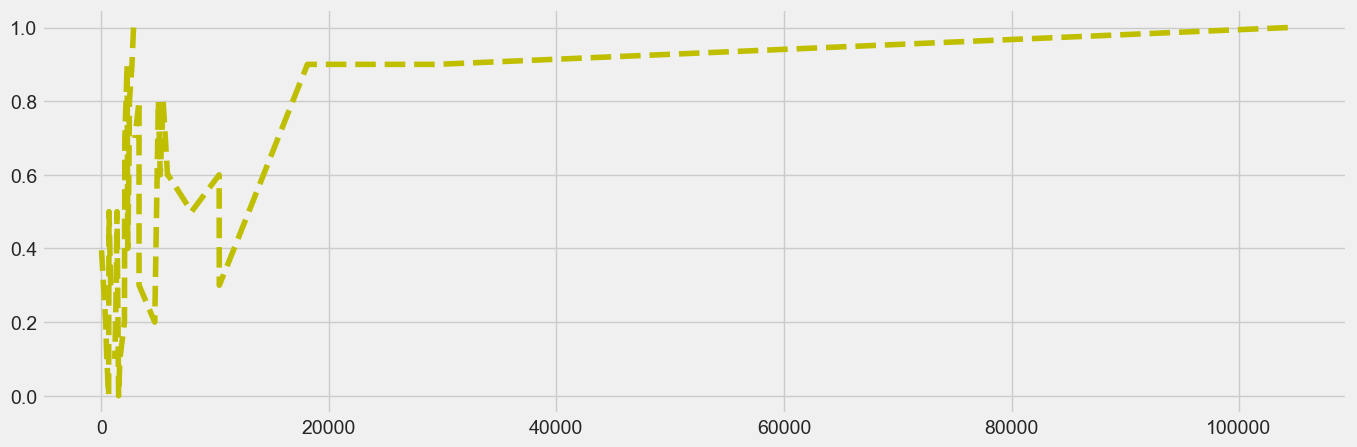

In [115]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(df_covid_external_df['Confirmed cases'],df_covid_external_df['Population Density'],'y--')
plt.savefig('dense')

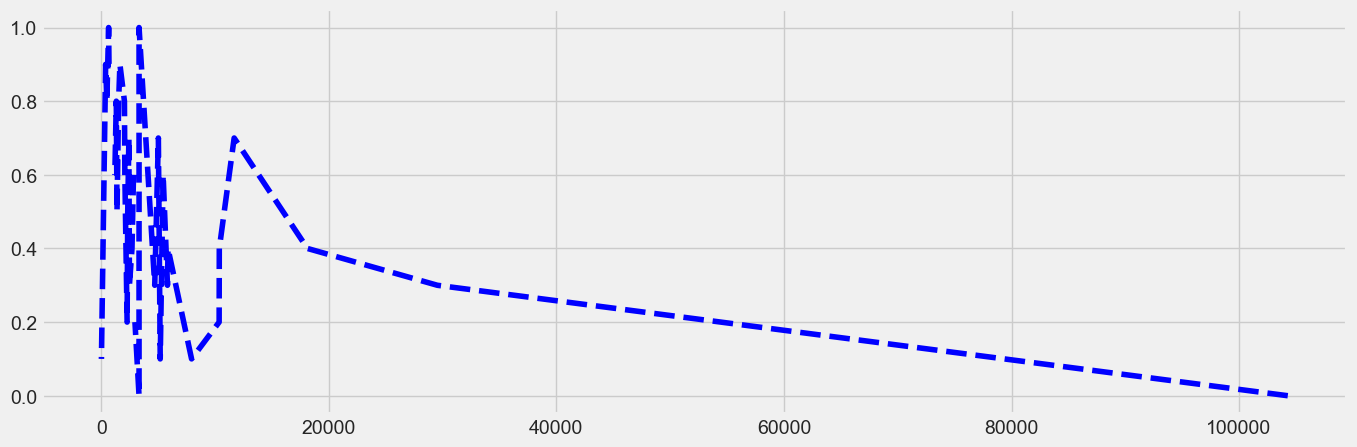

In [116]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(df_covid_external_df['Confirmed cases'],df_covid_external_df['Overall CCVI Index'],'b--')
plt.savefig('Less Dense Area')

Comment:

* Less dense area has the highest confirmed cases

Plot  bar chart for the First Quarter GDP versus Year

Text(0.5, 1.0, 'First Quarter GDP versus Year')

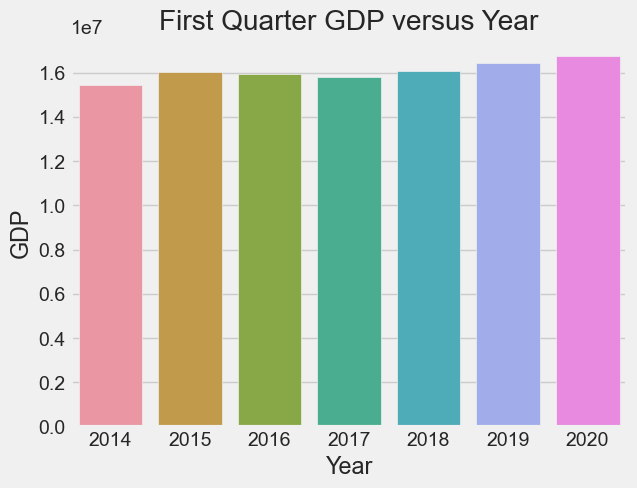

In [117]:
sns.barplot(x = 'Year', y = 'GDP', data=quarter1)
plt.title('First Quarter GDP versus Year')

From the above graph, it can be concluded that year 2020 recorded the highest GDP more than 16 million while year 2014 recorded the least GDP with less than 16 million.

Plot bar chart for the Second Quarter GDP versus Year

Text(0.5, 1.0, 'Second Quarter GDP versus Year')

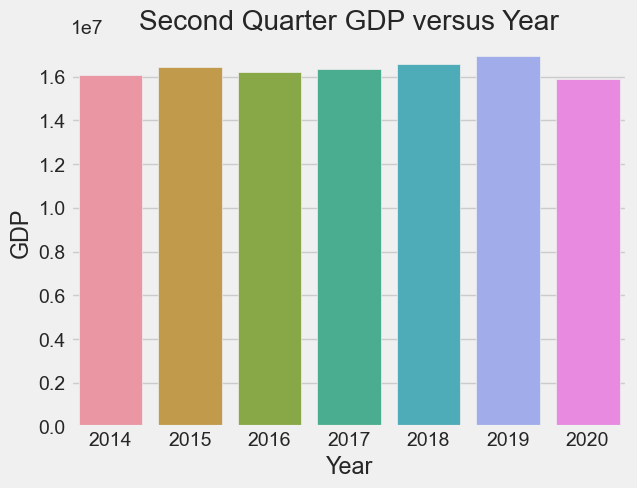

In [118]:
sns.barplot(x = 'Year', y = 'GDP', data=quarter2)
plt.title('Second Quarter GDP versus Year')

Plot bar chart for the Third Quarter GDP versus Year

Text(0.5, 1.0, 'Third Quarter GDP versus Year')

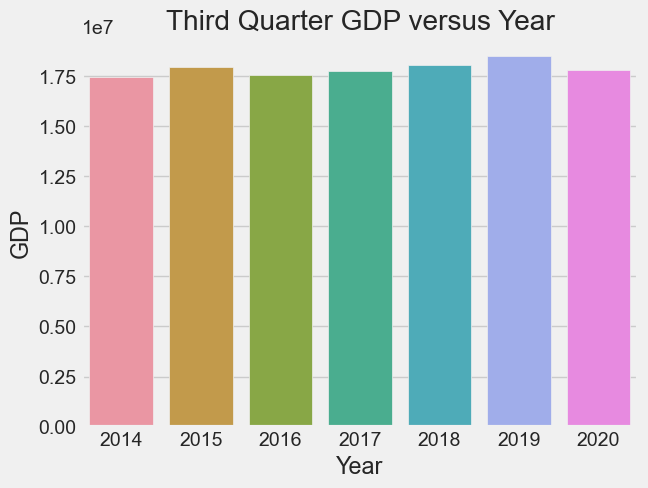

In [119]:
sns.barplot(x = 'Year', y = 'GDP', data=quarter3)
plt.title('Third Quarter GDP versus Year')

In the third quarter of the year, year 2019 recorded the highest GDP close to 20 million while year 2014 and 2016 recorded the least GDP of 17.5 million

Plot the bar chart for the Last Quarter GDP versus Year

Text(0.5, 1.0, 'Last Quarter GDP versus Year')

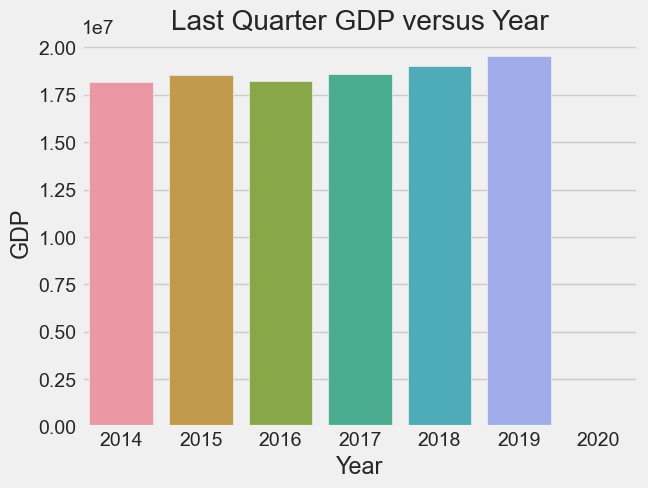

In [120]:
sns.barplot(x = 'Year', y = 'GDP', data=last_quarter)
plt.title('Last Quarter GDP versus Year')

Comment:

* No GDP recorded in the 2020,2019 was the year recorded the highest GDP approximately 20million while 2014 and 2016 recorded the least GDP.

Plt the bar chart for the GDP Vs Year

Text(0.5, 1.0, 'GDP Versus Year')

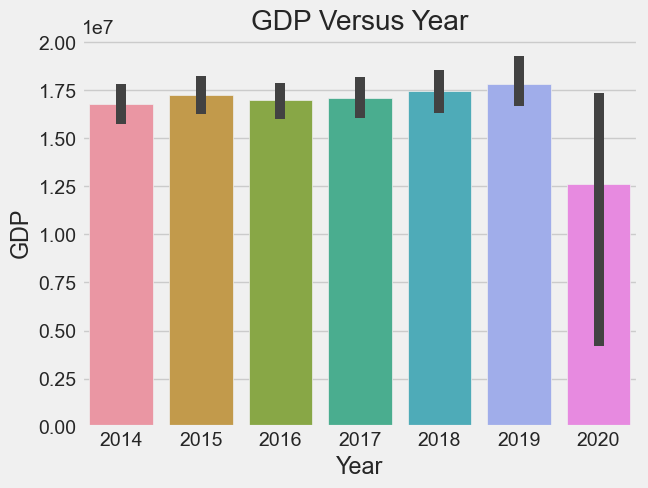

In [121]:
sns.barplot(x = 'Year', y = 'GDP', data = gdp_df)
plt.title('GDP Versus Year')

Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

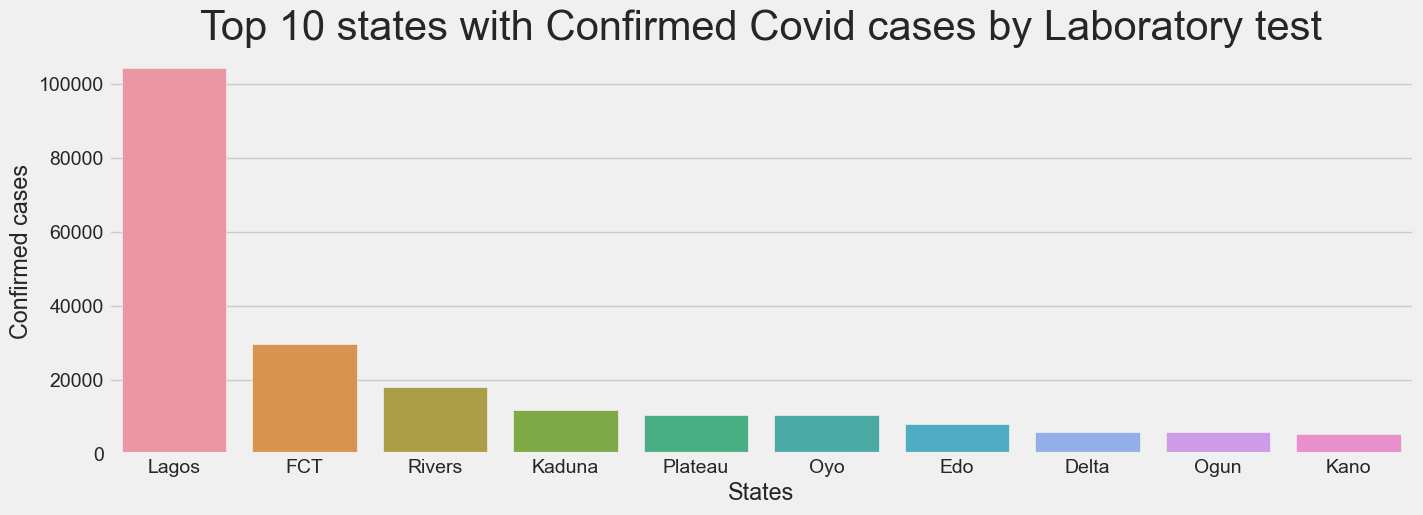

In [122]:
df = df.sort_values(by=['Confirmed cases'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Confirmed cases', data = df).set_title("Top 10 states with Confirmed Covid cases by Laboratory test", fontdict = { 'fontsize': 30});

From the above result, Lagos State recorded highest number of confirmed cases with over 100000 while Kano, Delta and Ogun recorded least with less than 1000 patients.

Generate a plot that shows the Top 10 states in terms of Discharged Covid cases.

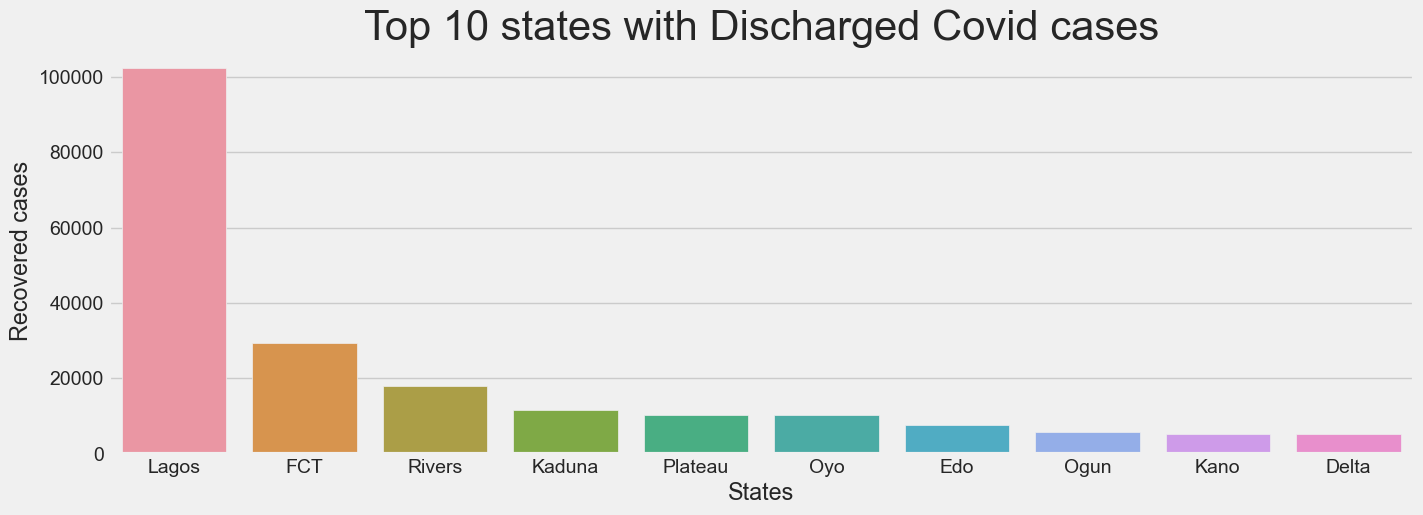

In [123]:
df = df.sort_values(by=['Recovered cases'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Recovered cases', data = df).set_title("Top 10 states with Discharged Covid cases", fontdict = { 'fontsize': 30});

Generate a plot that shows the Top 10 states in terms of Recovered Covid cases.

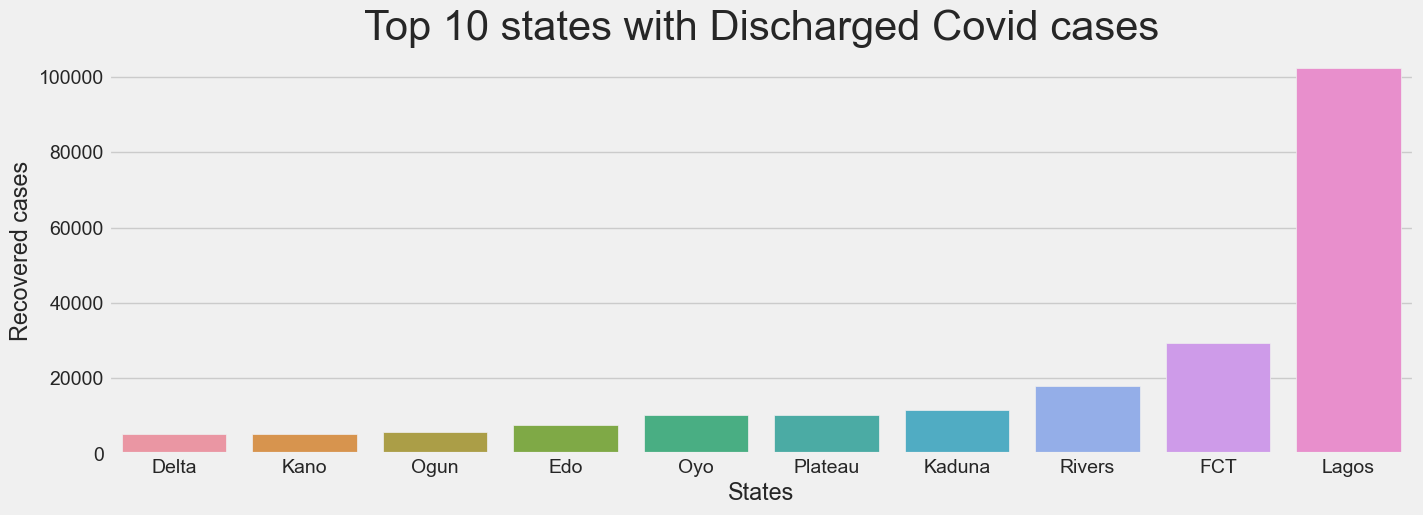

In [124]:
df = df.sort_values(by=['Recovered cases']).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Recovered cases', data = df).set_title("Top 10 states with Discharged Covid cases", fontdict = { 'fontsize': 30});

From the above result,

* Lagos State recorded highest number of discharged patients with over 100000 while Delta, Kano, Edo and Ogun recorded the least with less than 1000 patients.

Plot the top 10 Death cases

Text(0.5, 1.0, 'Top 10 states with Death Covid cases')

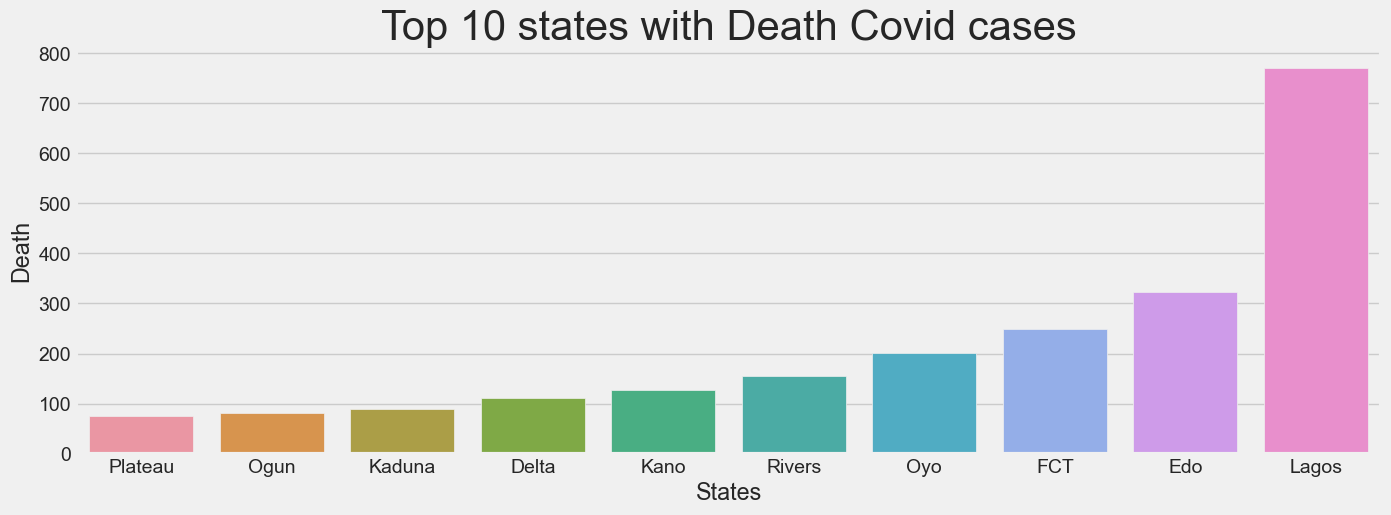

In [125]:
df = df.sort_values(by=['Death']).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Death', data = df).set_title("Top 10 states with Death Covid cases", fontdict = { 'fontsize': 30})

* Lagos has the highest number of death patient with over 700. 
* Edo is the second highest number of death rate follow by FCT with more than 300 and more than 200 respectively.
* Plateau, Ogun and Kaduna States recorded less than 100 death cases which is the least from the above result.

### Line plot for the total confirmed, recovered and death cases daily in Nigeria

Plot Scatter Plot of Admitted Cases and Confirmed Cases

Text(0.5, 1.0, 'Scatter Plot of Admitted Cases and Confirmed Cases.')

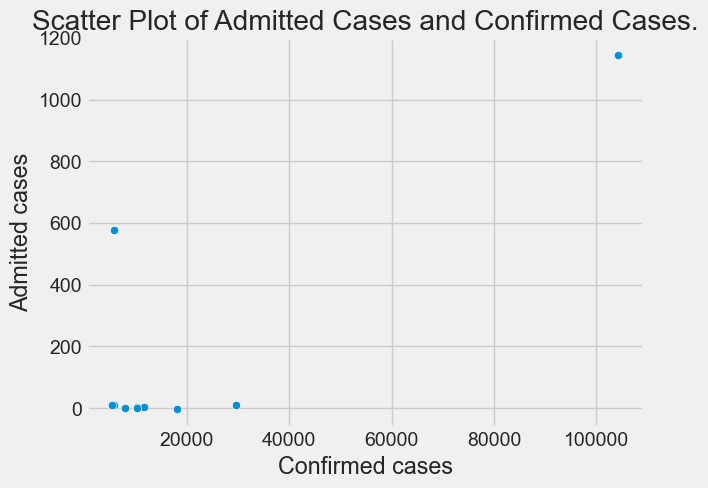

In [126]:
sns.scatterplot(x = 'Confirmed cases', y = 'Admitted cases', data = df)
plt.title('Scatter Plot of Admitted Cases and Confirmed Cases.')

Number of Admitted cases raise to over 1200 while Number of Confirmed Cases raise to over 100000

Plot Scatter Plot of Death Cases and Confirmed Case

Text(0.5, 1.0, 'Scatter Plot of Death Cases and Confirmed Cases.')

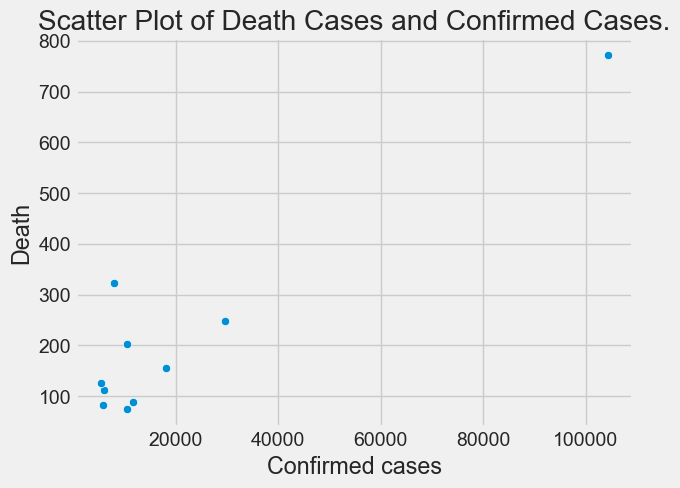

In [127]:
sns.scatterplot(x = 'Confirmed cases', y = 'Death', data = df)
plt.title('Scatter Plot of Death Cases and Confirmed Cases.')

The number of Admitted cases raise to over 800 while Number of Confirmed Cases raise to over 100000

Plot Scatter Plot of Death Cases and the Corresponding States

Text(0.5, 1.0, 'Scatter Plot of Death Cases and the Corresponding States.')

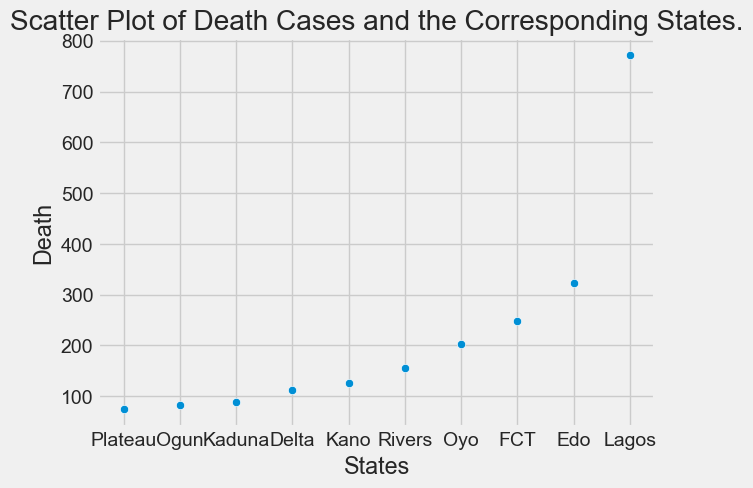

In [128]:
sns.scatterplot(x = 'States', y = 'Death', data = df)
plt.title('Scatter Plot of Death Cases and the Corresponding States.')

* From the graph above result, it is shown that Lagos highest number of death record close to 800 follow by Edo with more than 300 but less than 350 while both Plateau and Ogun recorded less record of death below 100.

Scatter Plot of Admitted Cases and the Corresponding States

Text(0.5, 1.0, 'Scatter Plot of Admitted Cases and the Corresponding States.')

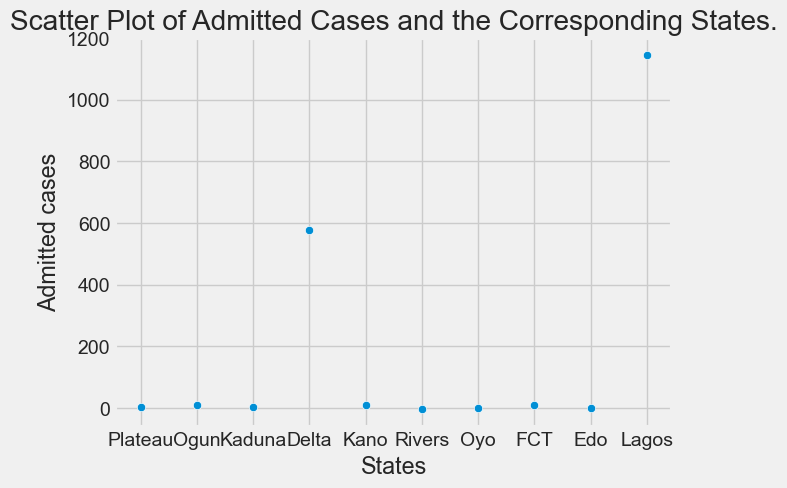

In [129]:
sns.scatterplot(x = 'States', y = 'Admitted cases', data = df)
plt.title('Scatter Plot of Admitted Cases and the Corresponding States.')

The Scatter graph above shows that Lagos recorded the highest number of admission case with more than 1500 patients follow by Delta close to 600 while other states like Edo, Plateau, Rivers and Oyo recorded no patient  but Kaduna, Ogun, Kano and FCT recorded below 20 patients.

### Correlation between the columns

In [130]:
df.corr()

,Confirmed cases,Admitted cases,Recovered cases,Death
Confirmed cases,1.000000,0.825508,0.999969,0.930977
Admitted cases,0.825508,1.000000,0.821268,0.780649
Recovered cases,0.999969,0.821268,1.000000,0.929848
Death,0.930977,0.780649,0.929848,1.000000


Correlation between Confirmed, Admitted, Recovered and Death Cases

Text(0.5, 1.0, 'Correlation between Confirmed, Admitted, Recovered and Death Cases')

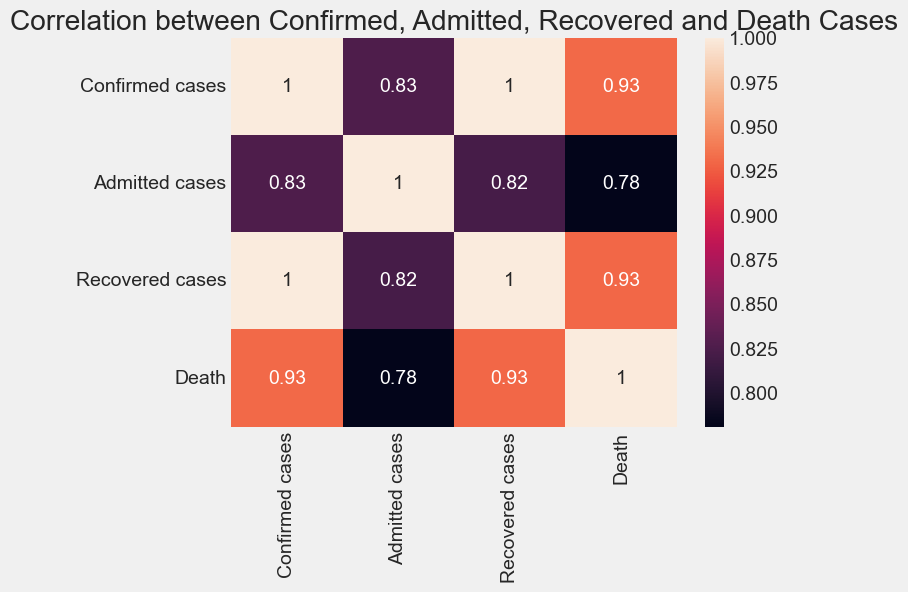

In [131]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between Confirmed, Admitted, Recovered and Death Cases')

There is a high correlation coefficient between:

* Death and Confirmed cases, correlation coefficient is 0.93
* Recovered cases and Confirmed cases, correlation coefficient is 1
* Recovered cases and Death cases, correlation coefficient is 0.93
* Admitted cases and Confirmed cases, correlation coefficient is 0.83
* Confirmed cases to Confirmed cases, correlation coefficient is 1
* Death cases to Death cases, correlation coefficient is 1
* Recovered cases to Recovered cases, correlation coefficient is 1
* Admitted cases and Admitted cases, correlation coefficient is 1
* Low correlation coefficient between Admitted cases and Death cases, correlation coefficient is 0.78

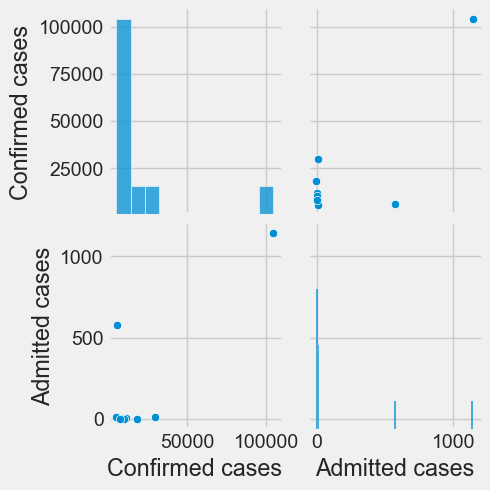

In [132]:
sns.pairplot(df, vars=['Confirmed cases', 'Admitted cases'])

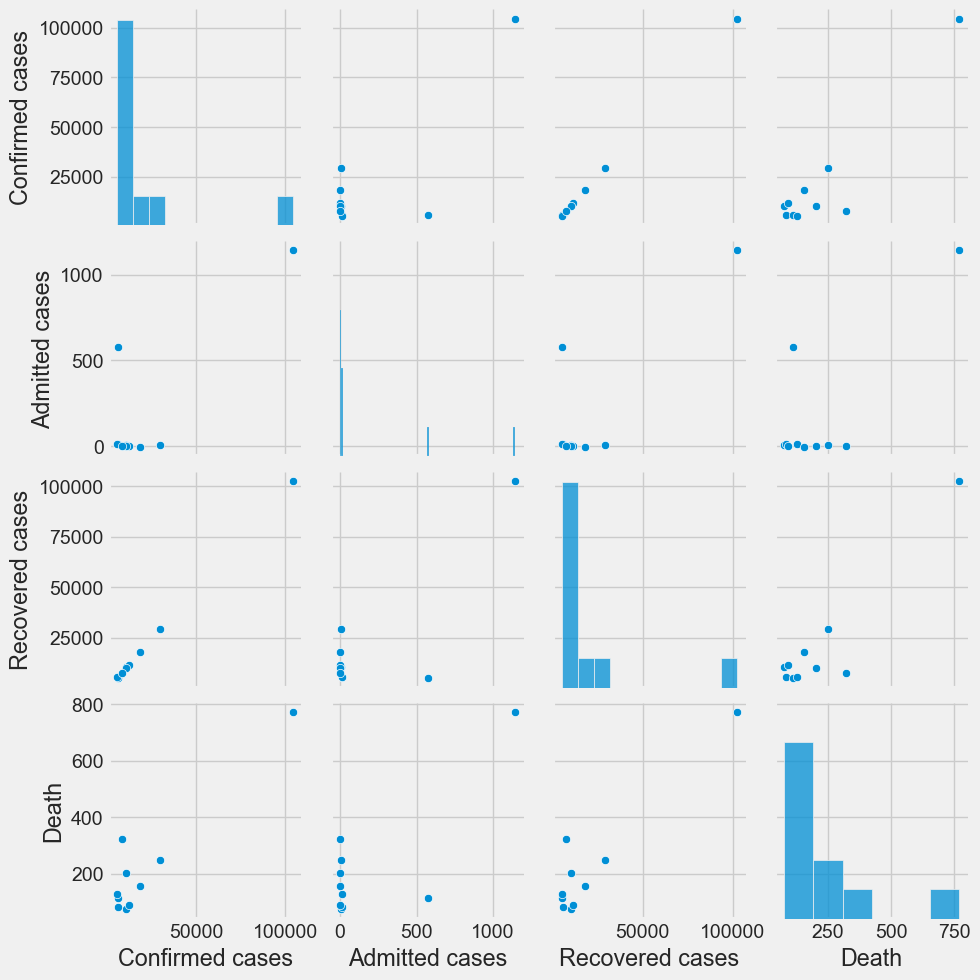

In [133]:
sns.pairplot(df, vars=['Confirmed cases', 'Admitted cases', 'Recovered cases', 'Death'])

#### Distribution plots

Distribution Density Plot for Death Rate

Text(0.5, 1.0, 'Distribution Density for Death Rate')

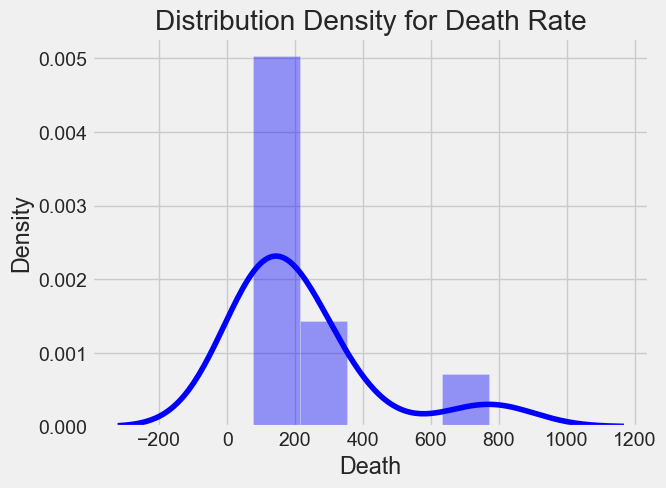

In [134]:
sns.distplot(df['Death'],bins = 5, color = 'blue')
plt.title('Distribution Density for Death Rate')

Death Rate recorded mostly between 0 to 200

Distribution Density for Confirmed cases

Text(0.5, 1.0, 'Distribution Density for Confirmed cases')

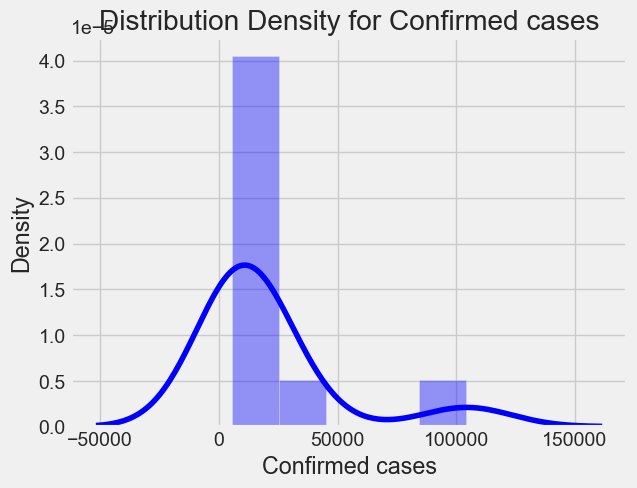

In [135]:
sns.distplot(df['Confirmed cases'],bins = 5, color = 'blue')
plt.title('Distribution Density for Confirmed cases')

Bar Chart for the Deaths and Affected States

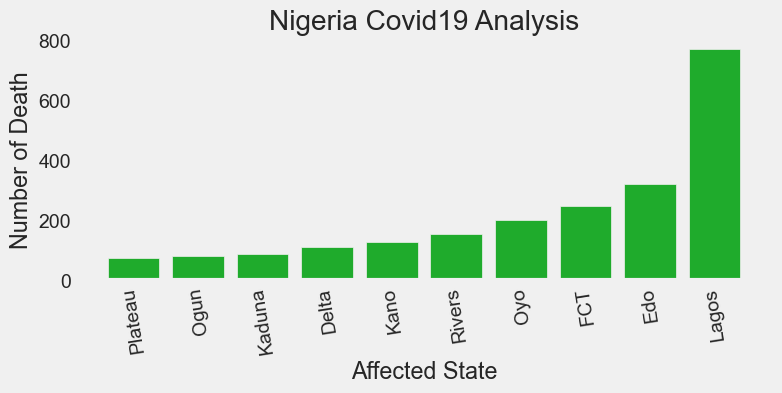

In [136]:
# Create a Figure
fig = plt.figure(figsize=(8, 3))

# Create a bar plot of name vs grade
plt.bar(x=df['States'], height=df['Death'], color='#1fab2c')

# Customize the chart
plt.title('Nigeria Covid19 Analysis')
plt.xlabel('Affected State')
plt.ylabel('Number of Death')
plt.grid()
plt.xticks(rotation=99)
plt.show()

Comments:

* From the bar chart above, it is shown that:
    * Lagos State has the highest death rate while Ogun and Plateau States recorded the least death rate in Nigeria.

Bar chart showing the number of confirmed cases in the 37 state

Text(0, 0.5, 'Confirmed Cases')

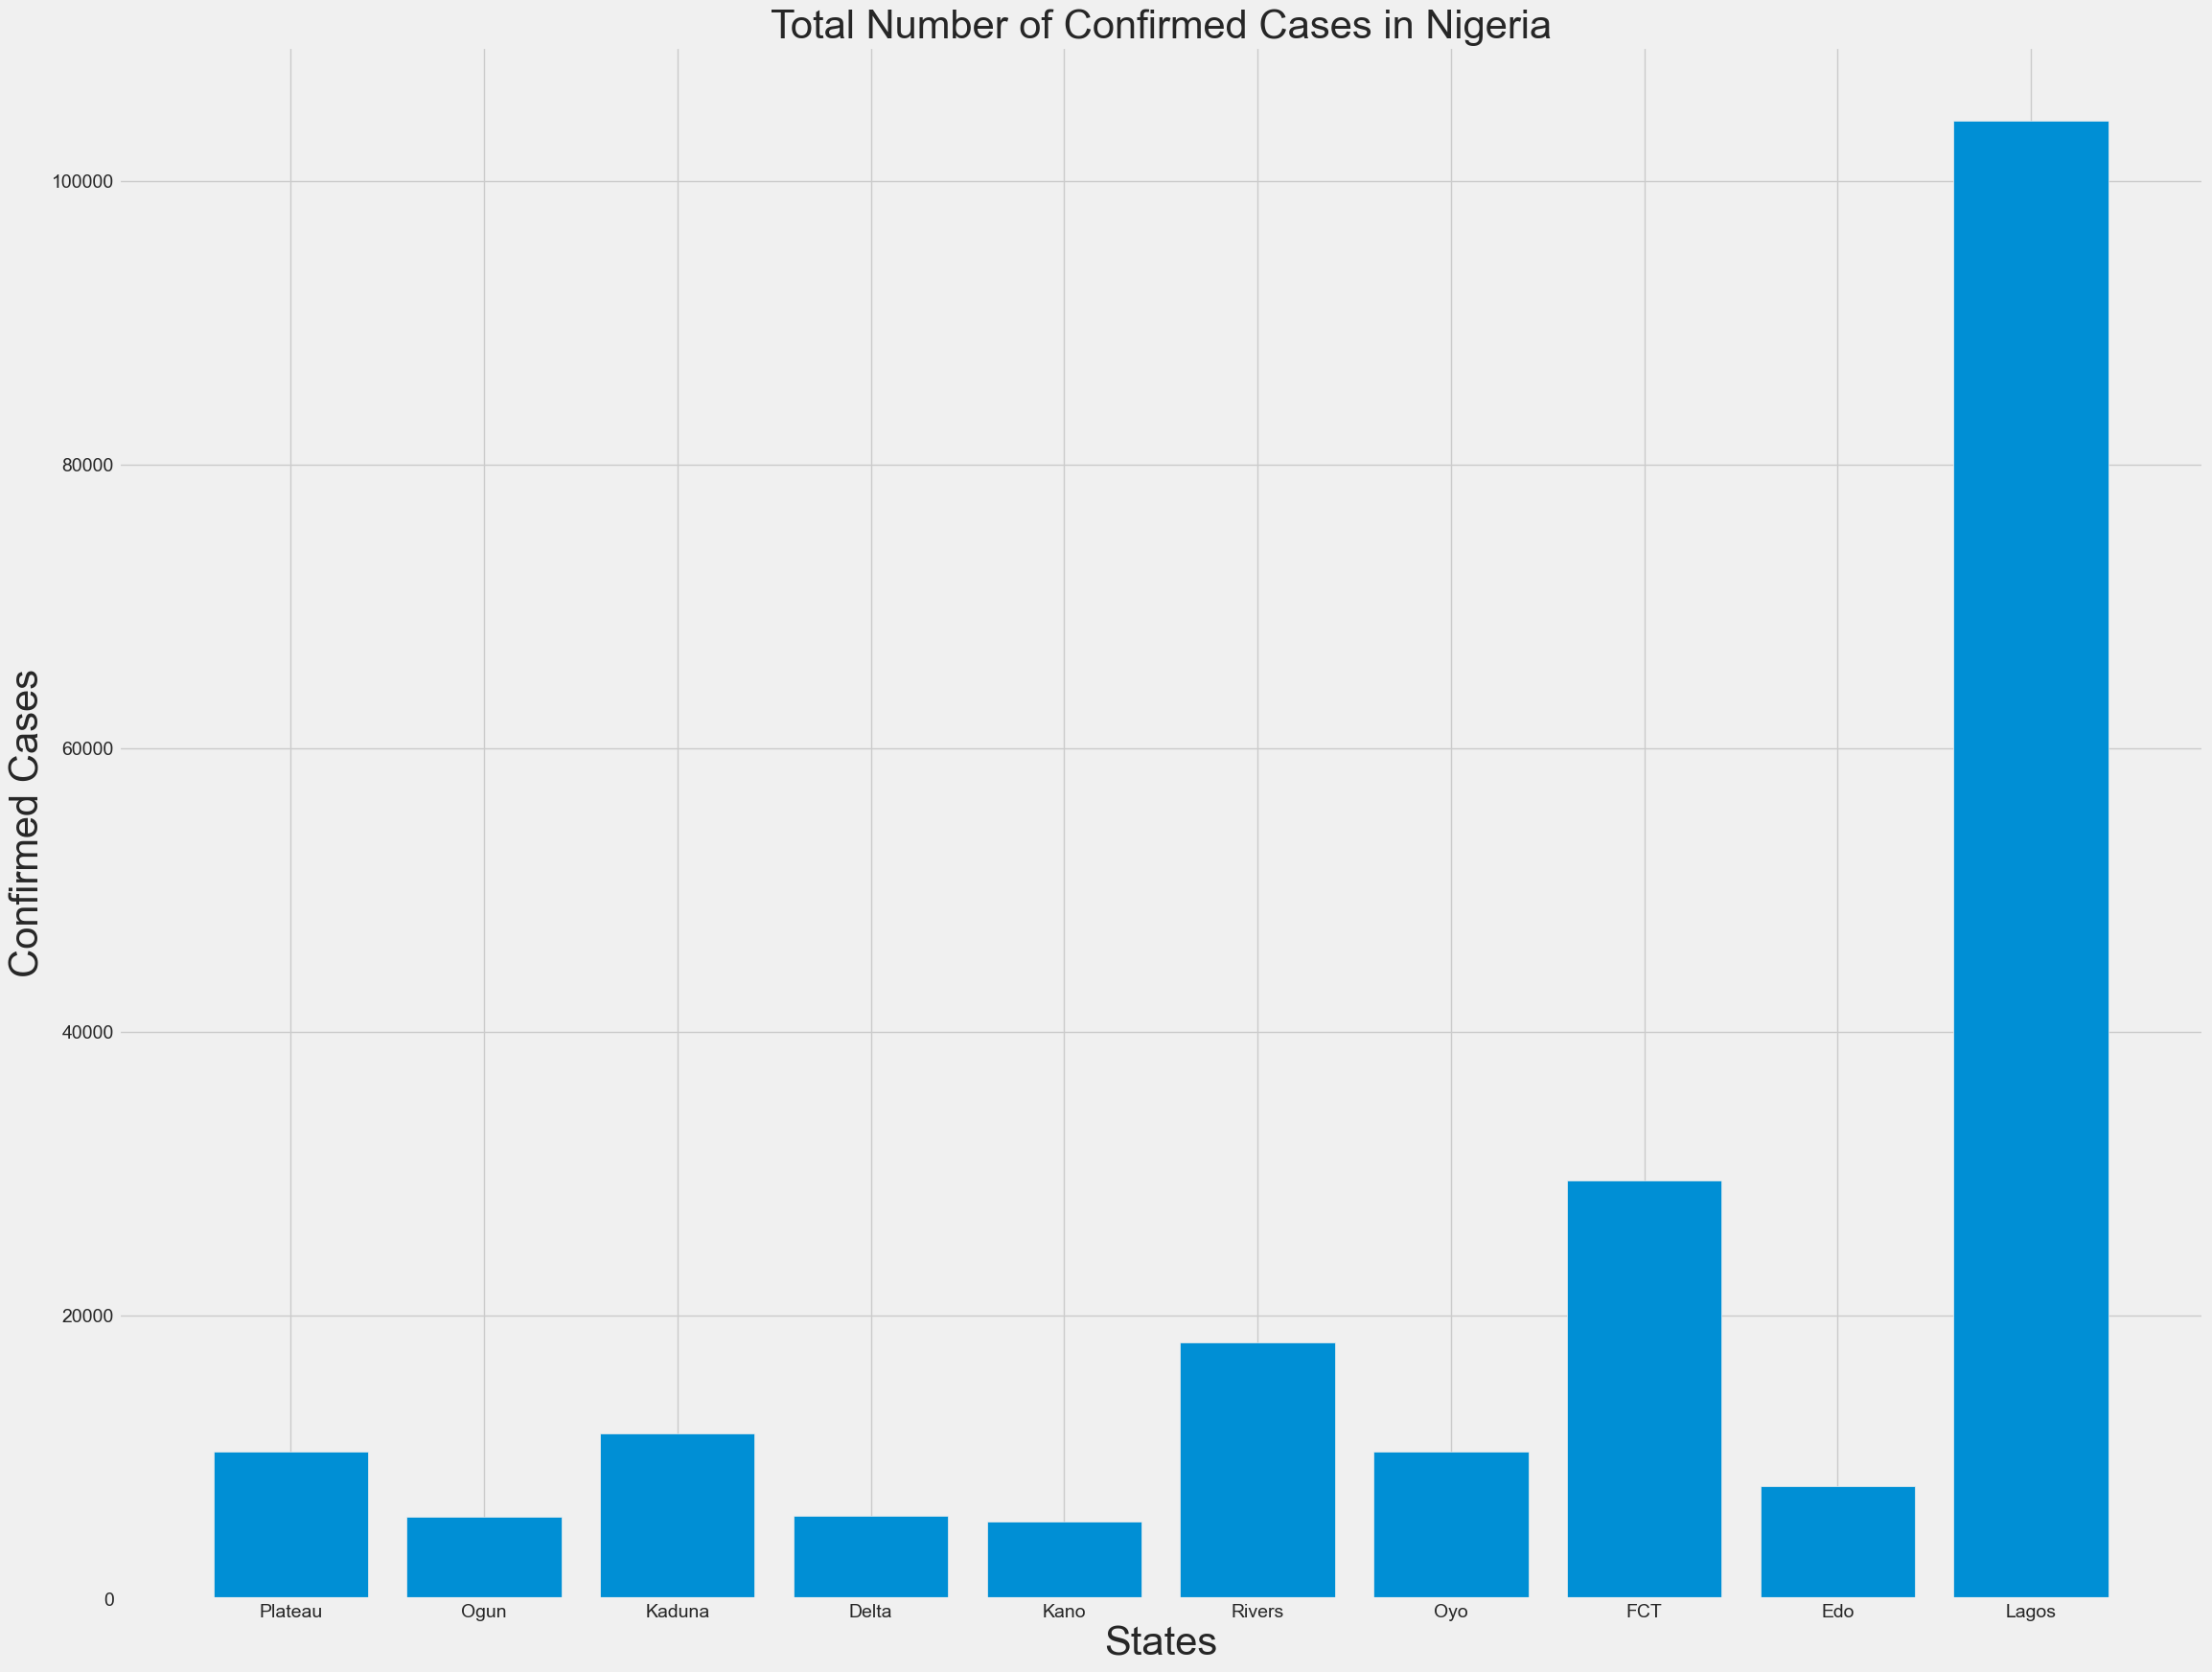

In [137]:
fig,ax=plt.subplots(figsize=(25,20))
ax.bar(df['States'],df['Confirmed cases'])
plt.title('Total Number of Confirmed Cases in Nigeria', fontdict = { 'fontsize': 30})
plt.xlabel('States', fontdict = { 'fontsize': 30})
plt.ylabel('Confirmed Cases', fontdict = { 'fontsize': 30})

Bar chart showing the number of recovered cases in the 37 state

Text(0, 0.5, 'Recovered Cases')

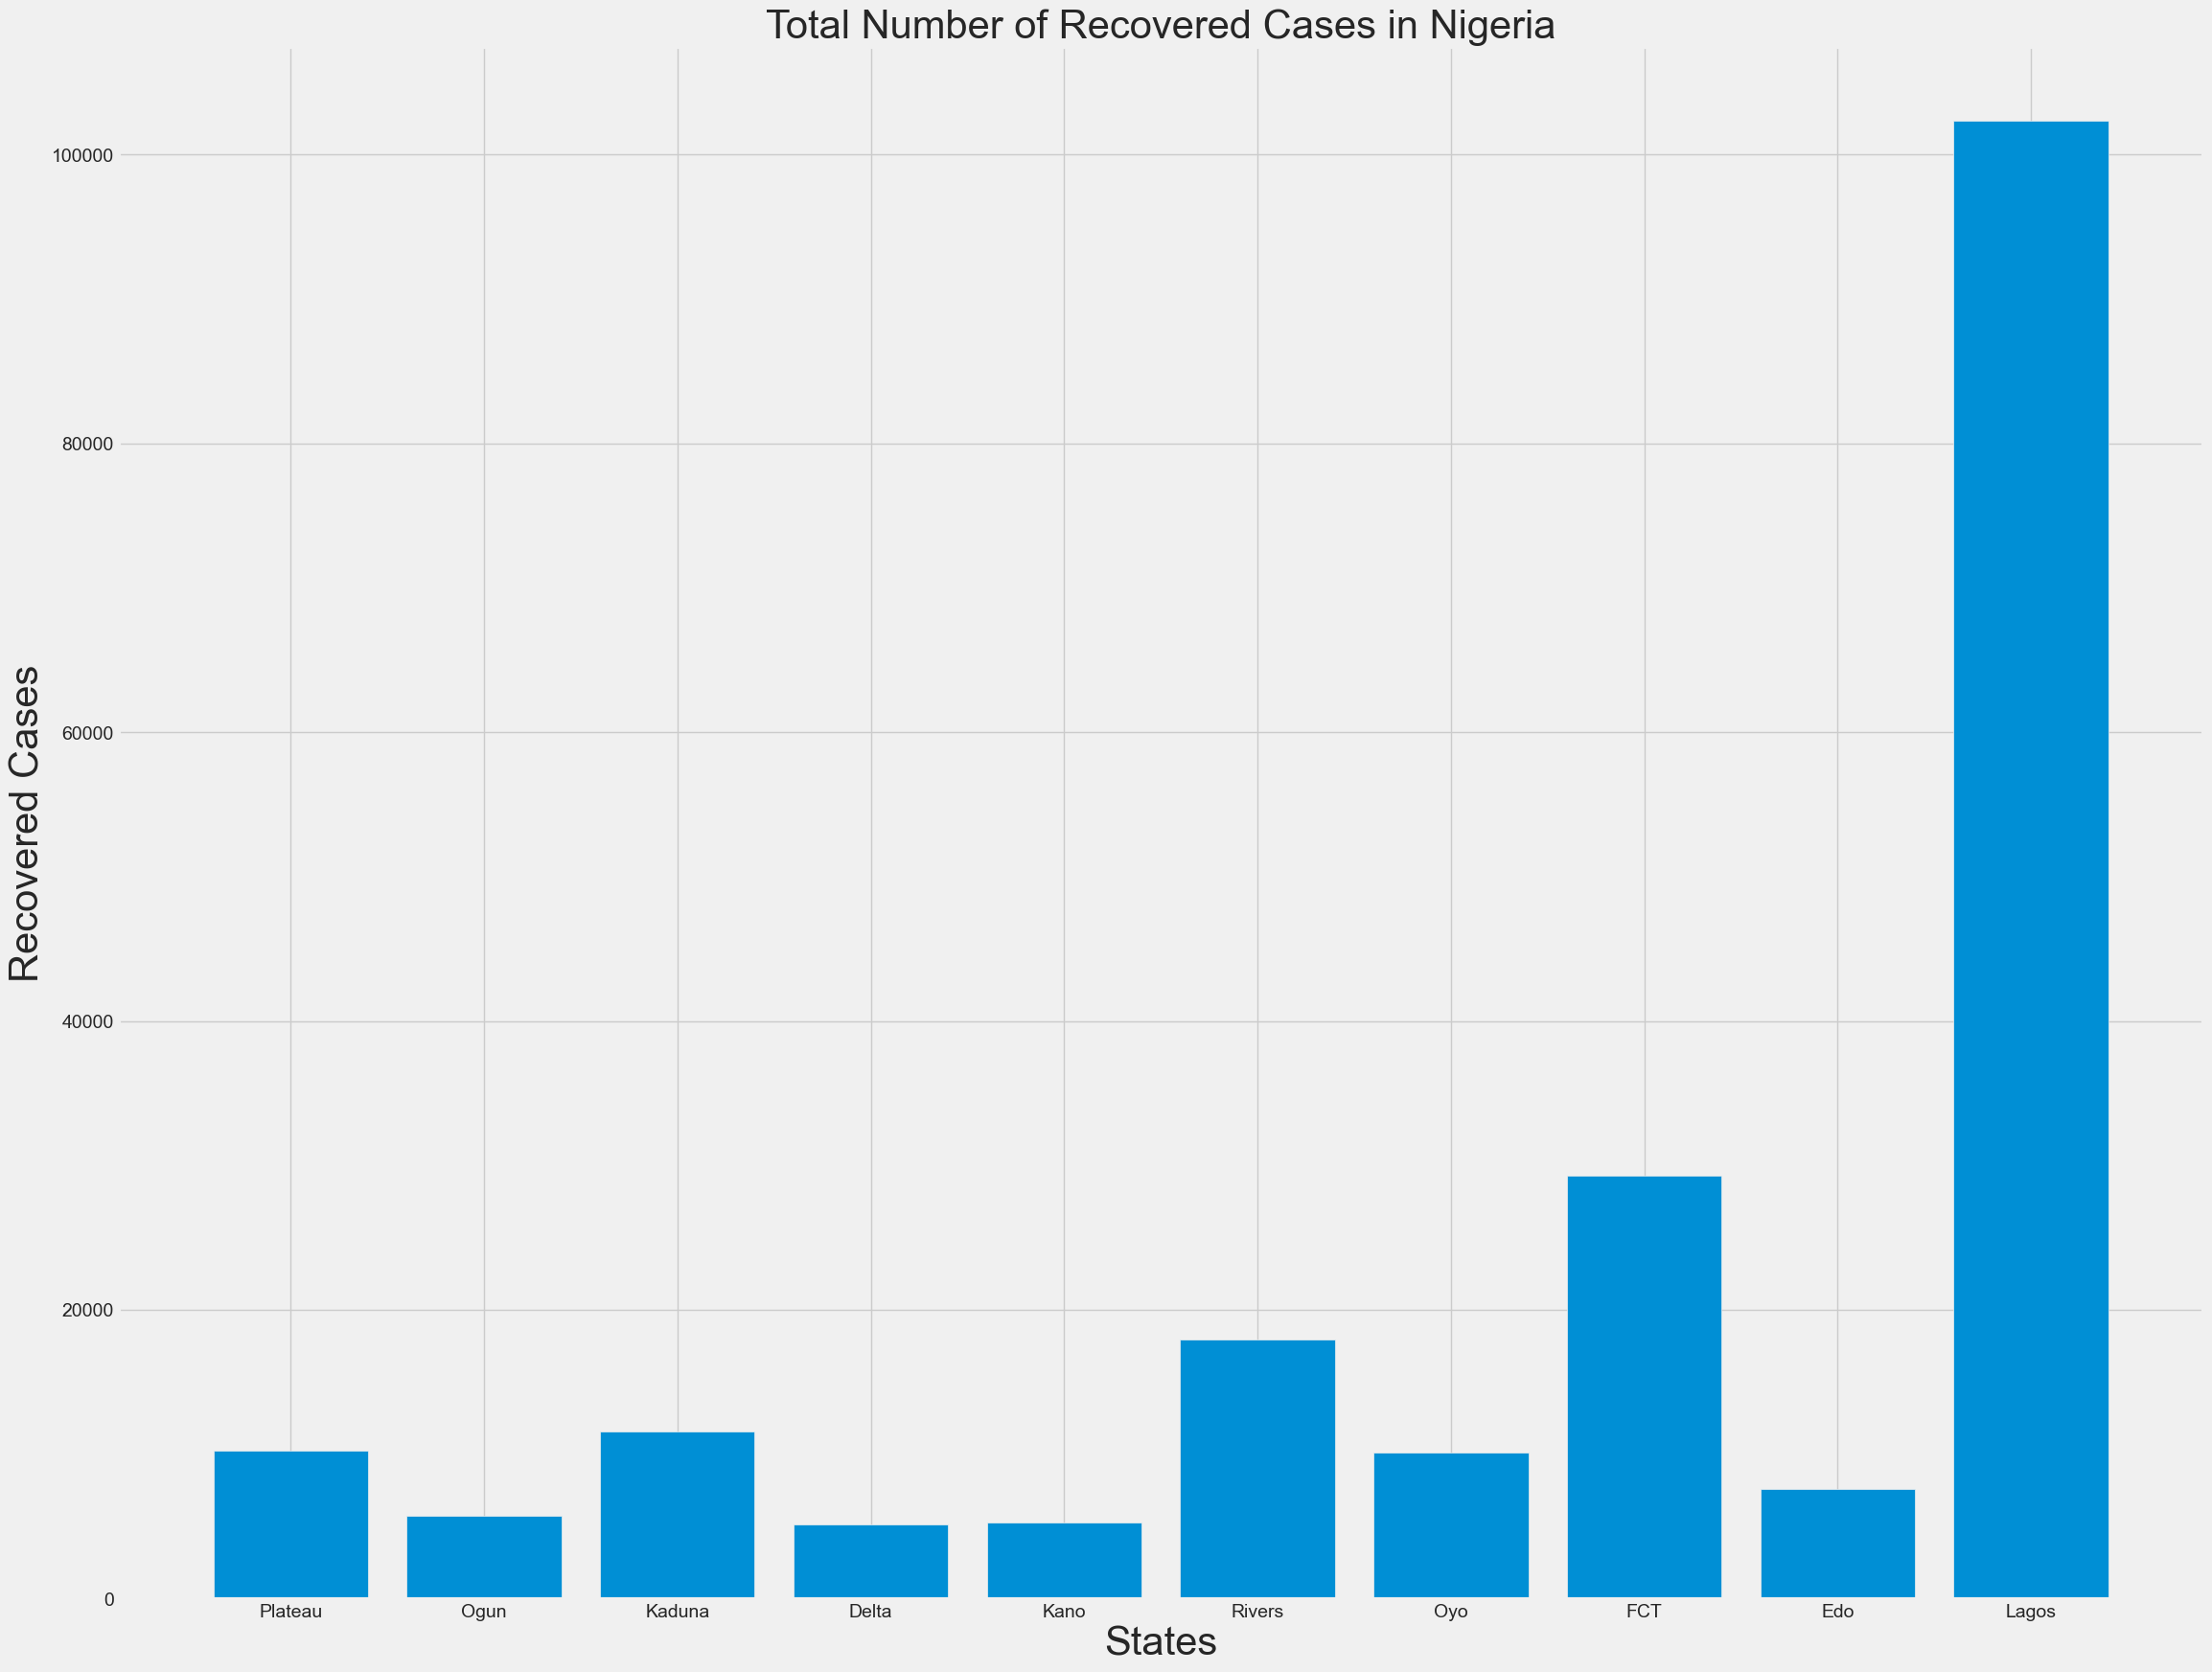

In [138]:
fig,ax=plt.subplots(figsize=(25,20))
ax.bar(df['States'],df['Recovered cases'])
plt.title('Total Number of Recovered Cases in Nigeria', fontdict = { 'fontsize': 30})
plt.xlabel('States', fontdict = { 'fontsize': 30})
plt.ylabel('Recovered Cases', fontdict = { 'fontsize': 30})

Bar chart showing the number of recovered cases in the 37 state

Text(0, 0.5, 'Death Cases')

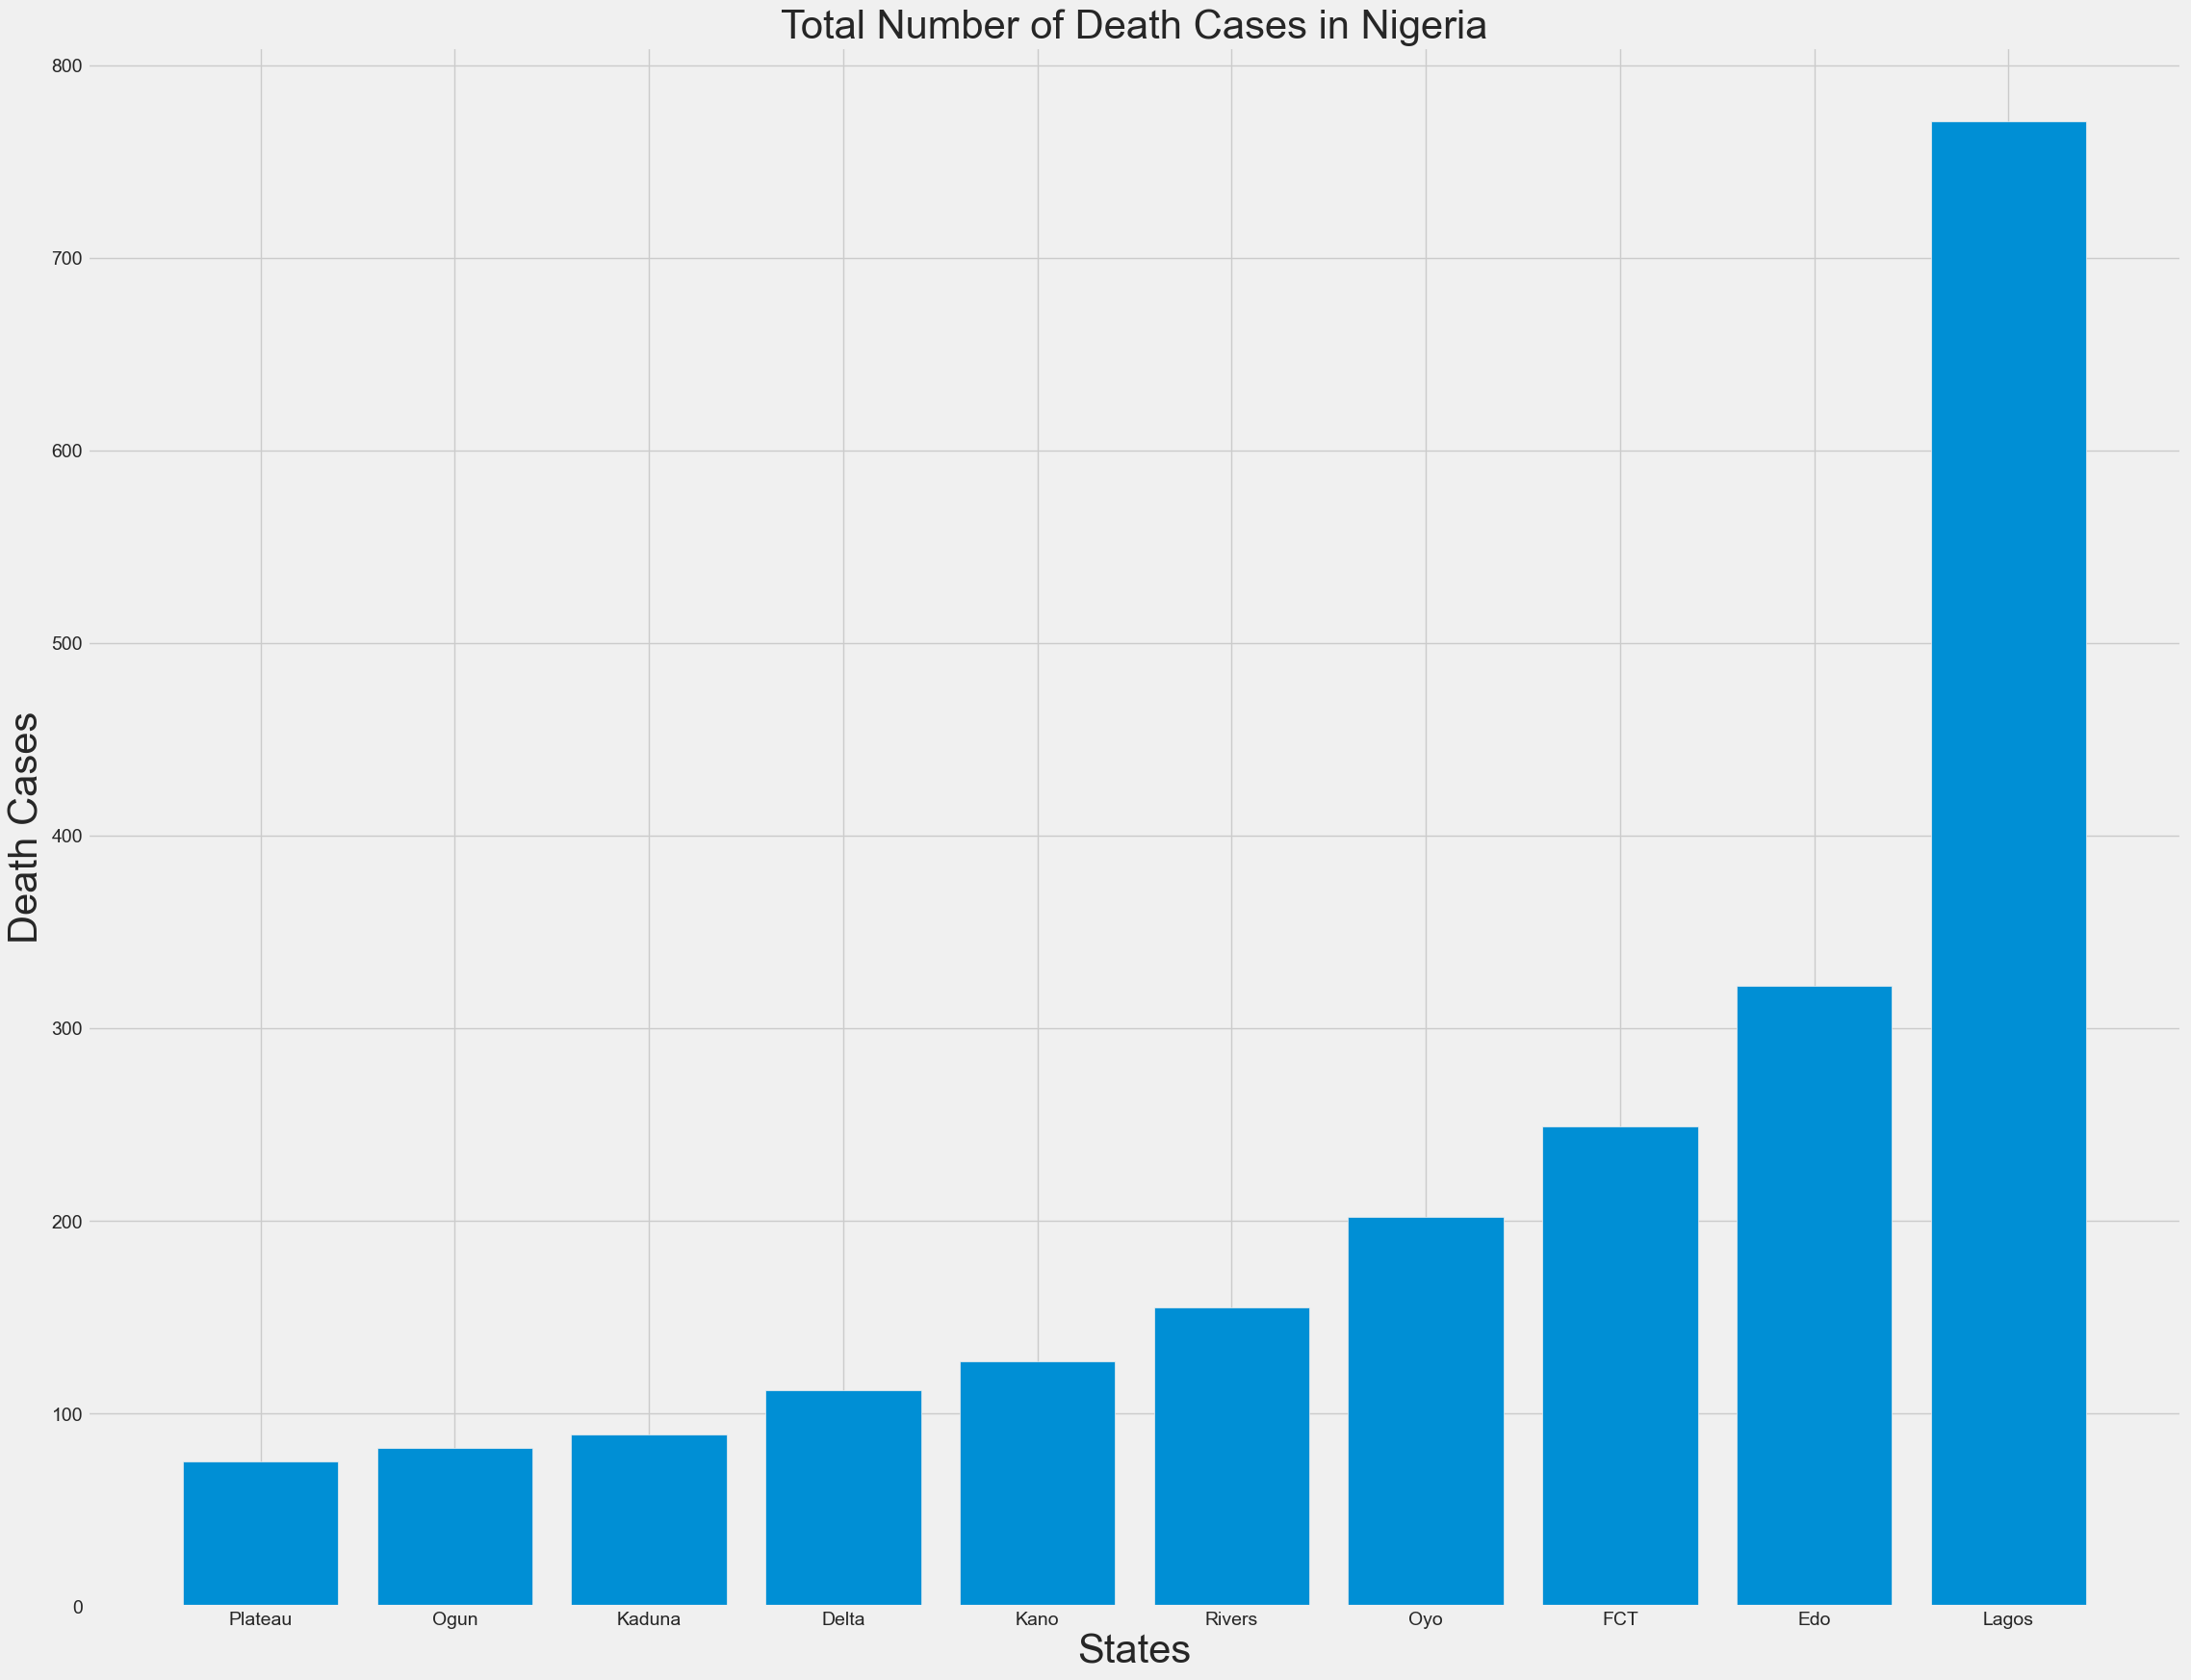

In [139]:
fig,ax=plt.subplots(figsize=(25,20))
ax.bar(df['States'],df['Death'])
plt.title('Total Number of Death Cases in Nigeria', fontdict = { 'fontsize': 30})
plt.xlabel('States', fontdict = { 'fontsize': 30})
plt.ylabel('Death Cases', fontdict = { 'fontsize': 30})

## Histogram

Histogram Chart for the Death Cases Recorded

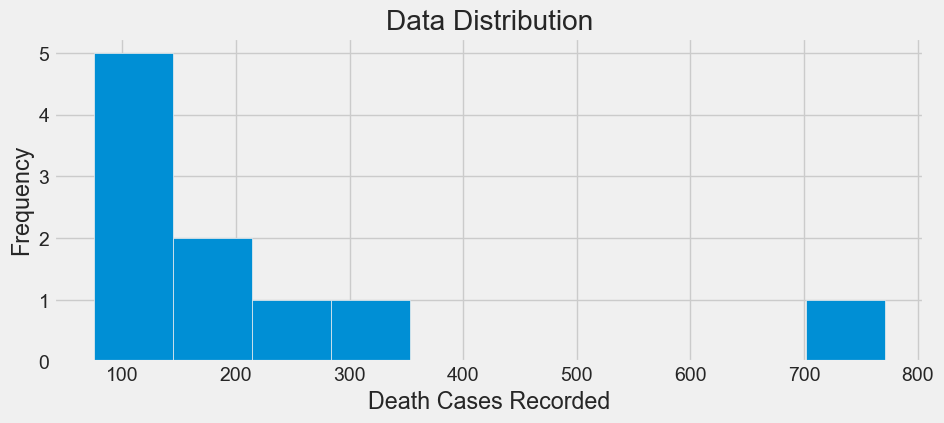

In [140]:
# Get the variable to examine
var_data = df['Death']

# Create a Figure
fig = plt.figure(figsize=(10, 4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Death Cases Recorded')
plt.ylabel('Frequency')

#Show the figure
fig.show()

## Machine Learning: Simple Linear Regression

Histogram Summary of all cases

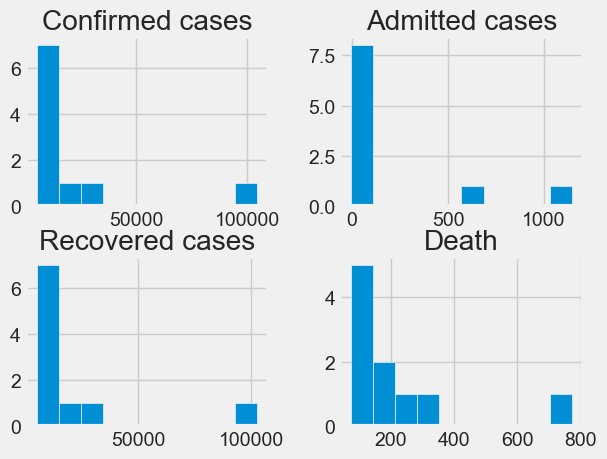

In [141]:
df.hist()
plt.show()

Minimum:75.00
Mean:218.40
Median:141.00
Mode:75.00
Maximum:771.00



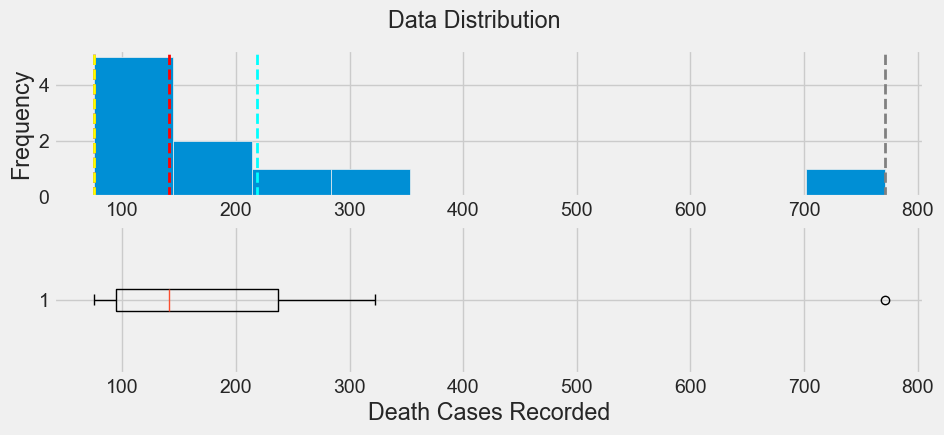

In [142]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))
    
    # Plot the histogram 
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'purple', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot 
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Death Cases Recorded')
    
    # Add a title to the Figure
    fig.suptitle('Data Distribution')
    
    # Show the figure
    fig.show()

show_distribution(df['Death'])

Comments:
* The yellow dash vertical line signifies mode(most occurrence) rate of death
* The dashed vertical red line signifies median(middle) rate of death
* The dashed vertical cyan line signifies mean rate of death
* The dashed vertical red line signifies median(middle) rate of death
* The dashed vertical purple line signifies least rate of death
* The dashed vertical gray line signifies highest rate of death

In [143]:
#fig,ax=plt.subplots(figsize=(20,15))
#sns.lineplot(x='Date',y='Confirmed',data=df,ax=ax,label='Confirmed',c='r')
#sns.lineplot(x='Date',y='Recovered',data=nigeria,ax=ax,label='Recovered',c='g')
#sns.lineplot(x='Date',y='Deaths',data=nigeria,ax=ax,label='Deaths',c='y')

### Pie Charts

Plot Pie chart for the States with their Daeath Record

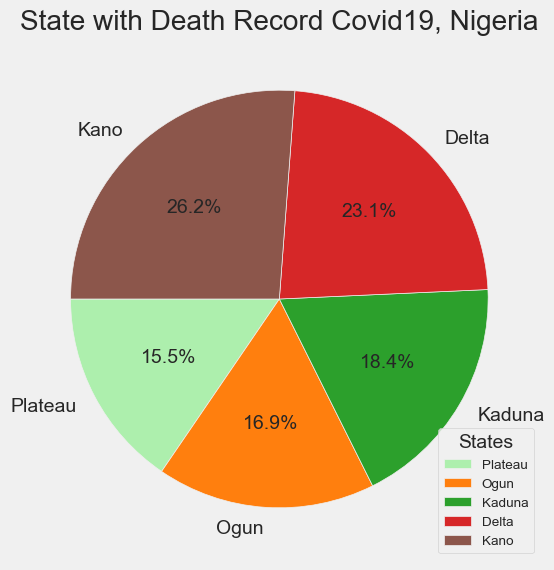

In [144]:
death = df["Death"].head()
state = df["States"].head()
colors = ["#adefad", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
#explode = (0.1, 0, 0, 0, 0)  
plt.figure(figsize = (6,8))
plt.pie(death, labels=state, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Death Record Covid19, Nigeria")
plt.show()

Comment:

Kano recorded the highest death of 26.2% follow by Delta with 23.1% while Plateau has the least record of 15.4%
Therefore it is unsafe to live in Kano.

Pie chart for the States with Confirmed cases

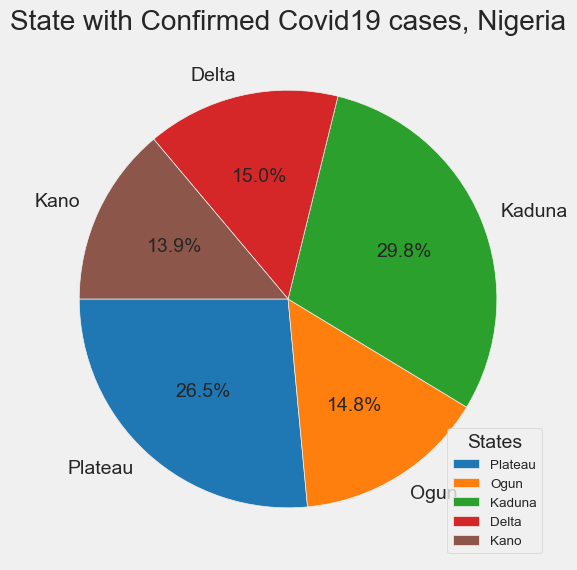

In [145]:
confirm = df["Confirmed cases"].head()
state = df["States"].head()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
plt.figure(figsize = (6,8))
plt.pie(confirm, labels=state, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Confirmed Covid19 cases, Nigeria")
plt.show()

Kaduna has the highest confirmed case record of 29.8% follow by Plateau with 26.5% while Kano has the least confirmed case recorded with 13.9%
Covid19 virus tends to spread more in Kaduna than any other selected states in Nigeria.

Pie chart for the States with admitted cases

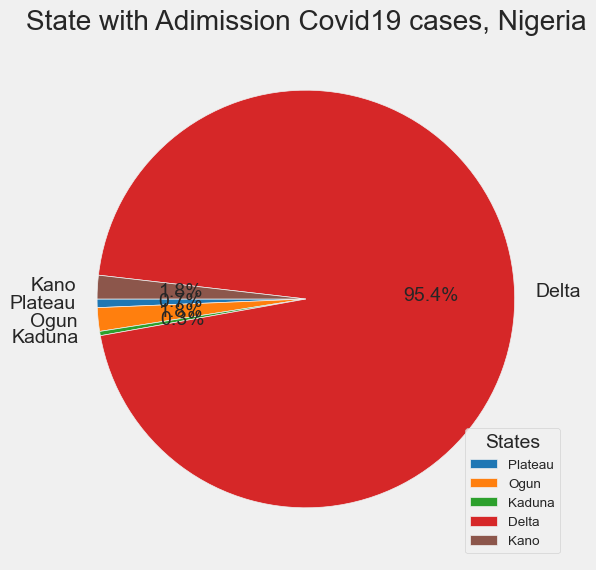

In [146]:
admitted = df["Admitted cases"].head()
state = df["States"].head()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
#explode = (0.1, 0, 0, 0, 0)  
plt.figure(figsize = (6,8))
plt.pie(admitted, labels=state, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Adimission Covid19 cases, Nigeria")
plt.show()

Delta has the highest number of admitted case recorded of 95.4%.

Pie chart for the States with discharged cases

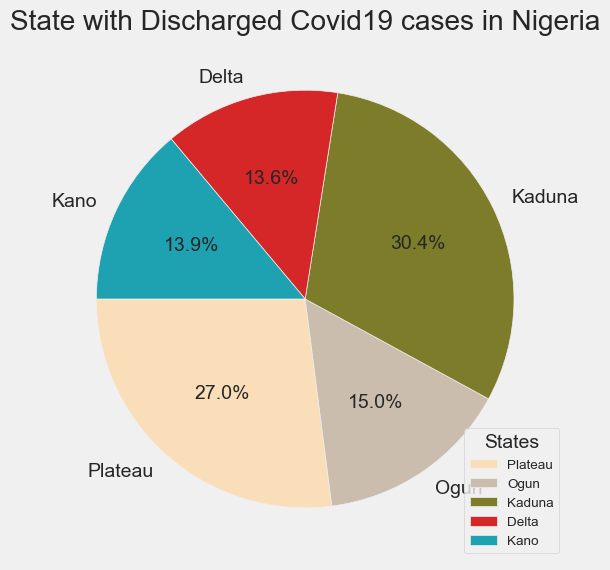

In [147]:
recover = df["Recovered cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"]
#explode = (0.1, 0, 0, 0, 0)  
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Discharged Covid19 cases in Nigeria")
plt.show()

Comment:

Kaduna is the state with the highest record of discharged with 30.4% follow by Plateau with 27% while Delta has the least record of discharged record

### Donut Plots

Donut Plot for the Recovered Cases

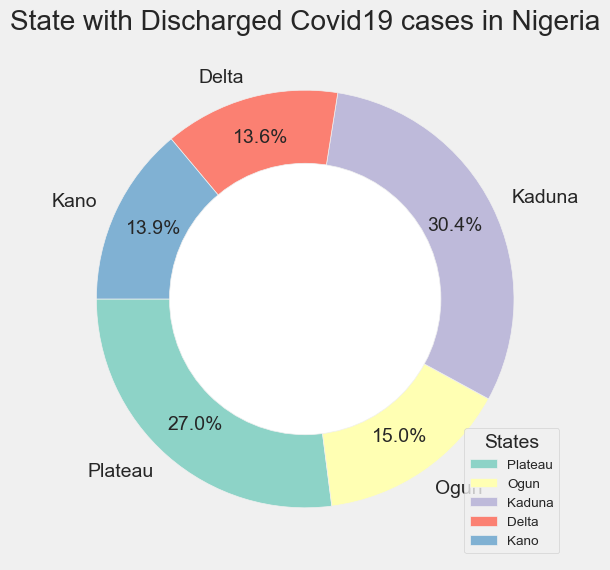

In [148]:
recover = df["Recovered cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"] 
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=sns.color_palette('Set3'),  pctdistance=0.80, autopct='%1.1f%%', startangle=180)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Discharged Covid19 cases in Nigeria")
plt.show()

Donut Plot for the Death cases in Nigeria

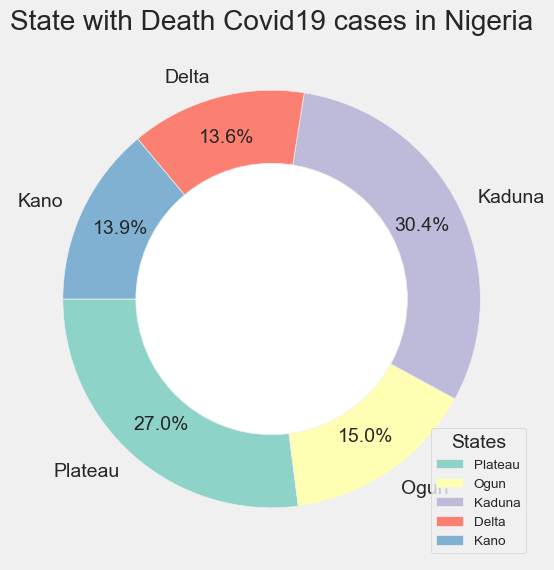

In [149]:
death = df["Death"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"] 
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=sns.color_palette('Set3'),  pctdistance=0.80, autopct='%1.1f%%', startangle=180)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Death Covid19 cases in Nigeria")
plt.show()

Donut Plot for the Confirmed cases in Nigeria

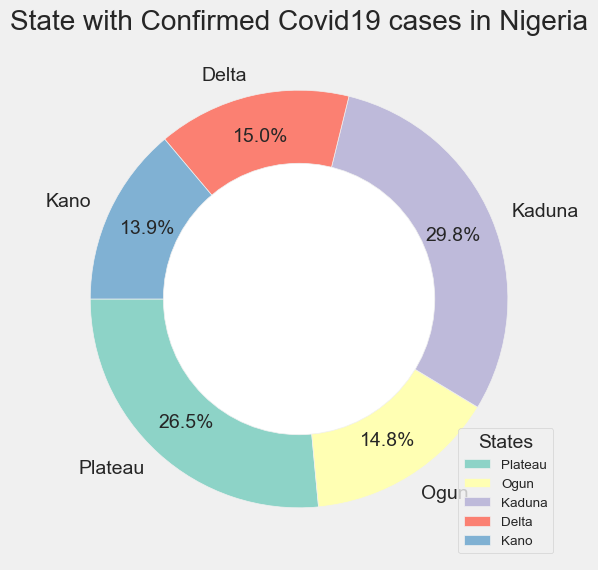

In [150]:
recover = df["Confirmed cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"] 
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=sns.color_palette('Set3'),  pctdistance=0.80, autopct='%1.1f%%', startangle=180)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Confirmed Covid19 cases in Nigeria")
plt.show()

Donut Plot for Admitted Cases

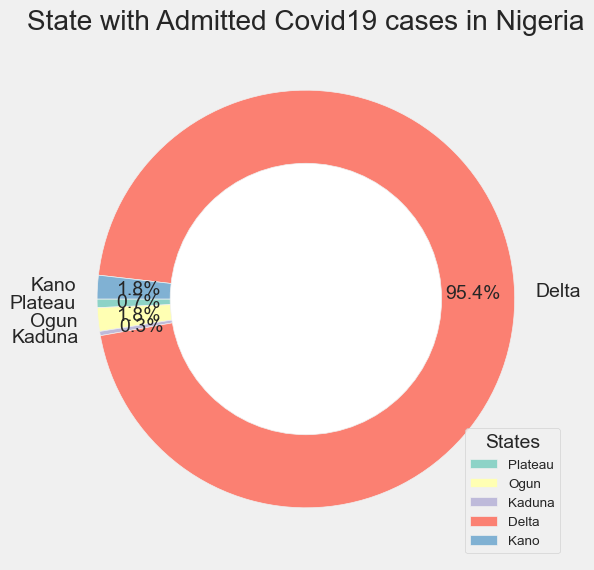

In [151]:
recover = df["Admitted cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"] 
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=sns.color_palette('Set3'),  pctdistance=0.80, autopct='%1.1f%%', startangle=180)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Admitted Covid19 cases in Nigeria")
plt.show()

Histogram to show the admitted cases

<AxesSubplot:xlabel='Admitted cases', ylabel='Count'>

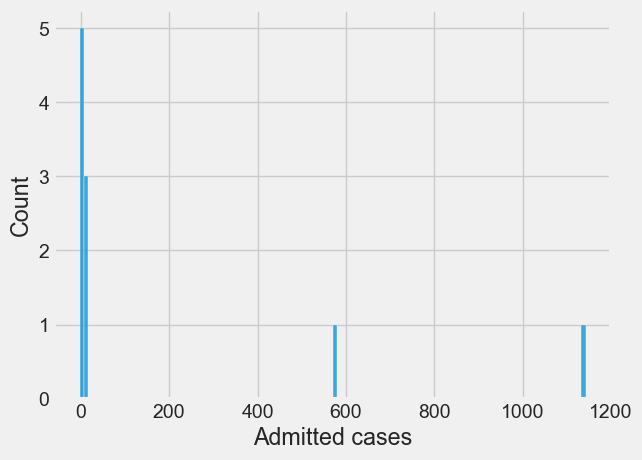

In [152]:
sns.histplot(data=df, x = 'Admitted cases')

## Summary
I learnt how to perform Exploratory Data Analysis (EDA) in Python and how to use external Python libraries like Pandas, Numpy, Matplotlib, Seaborn etc. to conduct univariate analysis, bivariate analysis and data visualization.

## Conclusion
It is no longer a news that COVID-19 pandemic has left no part of the world untouched. The virus emerged from Wuhan, China, and spread to all other country for example Nigeria. Base on the analysis carried out so far, COVID-19 pandemic has an enormous effect on Nigeria health, education, transportation, finance, telecommunication just to mention few. It is high time for leadership, citizens and state institutions to come together for solutions to prevent the deadly virus from spreading.

The following were applied and achieved successfully during the course of the Nigeria covid-19 data analysis project:

* Data collection process from data sources.
* Data cleaning and manipulation of data.
* Develop visualization skills through the use of open-source libraries in Python.
* Generate insights from analysis

## Reference
* https://covid19.ncdc.gov.ng/report/
* https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covidnig.csv
* https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
* https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
* https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
* https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/Budget%20data.csv
* https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/RealGDP.csv
* https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covid_external.csv
* https://www.w3schools.com/python/
* https://www.kaggle.com/learn/pandas
* https://pythoninstitute.org
* https://www.coursera.org/learn/python-for-applied-data-science-ai
* Python how to progeam by deitel deitel